In [64]:
import pandas as pd
import numpy as np
from math import log2

In [140]:
dataSet=pd.read_excel("C:/Users/kunal/Downloads/CommBankProject-20260203T080139Z-3-001/CommBankProject/homeLoanData.xlsx", header=None)   
dataSet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       501 non-null    object
 1   1       501 non-null    object
 2   2       501 non-null    object
 3   3       501 non-null    object
 4   4       501 non-null    object
 5   5       501 non-null    object
 6   6       501 non-null    object
 7   7       501 non-null    object
 8   8       501 non-null    object
 9   9       501 non-null    object
 10  10      501 non-null    object
 11  11      501 non-null    object
 12  12      501 non-null    object
 13  13      501 non-null    object
 14  14      501 non-null    object
dtypes: object(15)
memory usage: 58.8+ KB


In [141]:
dataSet.columns=dataSet.iloc[0]
dataSet=dataSet[1:].reset_index(drop=True)
dataSet

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95,360,3.5
2,2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
3,3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90,360,2.62
496,496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3
497,497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [142]:
dataSet.isna().sum(axis=0)


0
Column1                               0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [143]:
dataSet.describe()

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,0,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [144]:
[~dataSet.columns.isin(["Age of Borrower"])]

[array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True])]

In [145]:
dataSet.columns

Index(['Column1', 'Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [147]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]
dataSetPartOne.columns

Index(['Column1', 'Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Borrower Debt to Income Ratio',
       'Appraised Value of Home', 'Amount Borrowed', 'LTV Ratio',
       'Length of Mortgage in Months', 'Mortgage Interest Rate'],
      dtype='object', name=0)

In [148]:
newDataSet[:5]

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


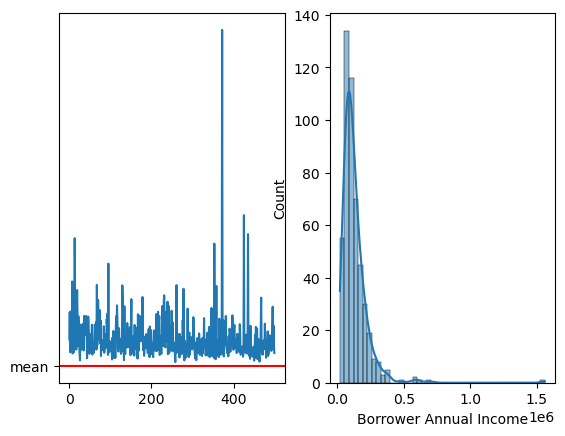

In [155]:
import matplotlib.pyplot as myplot
import seaborn as sns
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= 'mean', color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

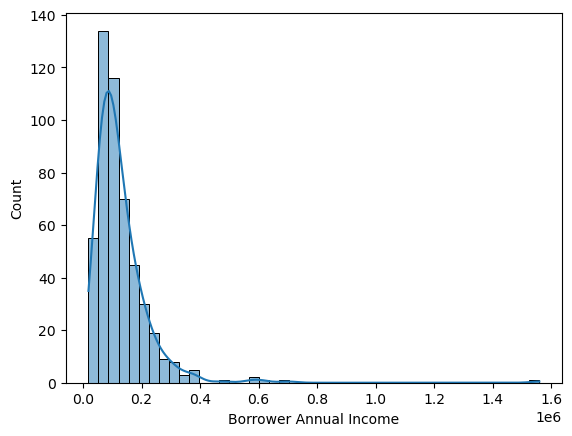

In [156]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [157]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
372,372,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [158]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

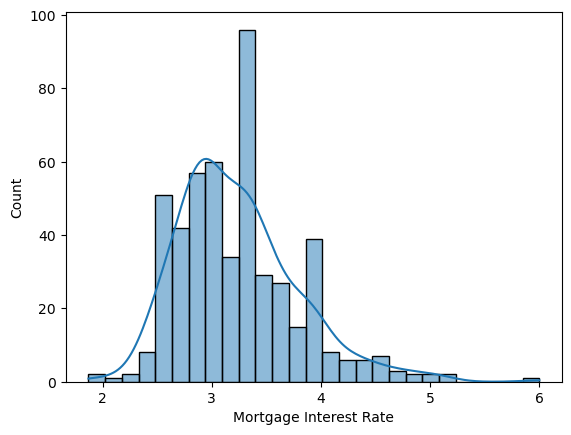

In [159]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

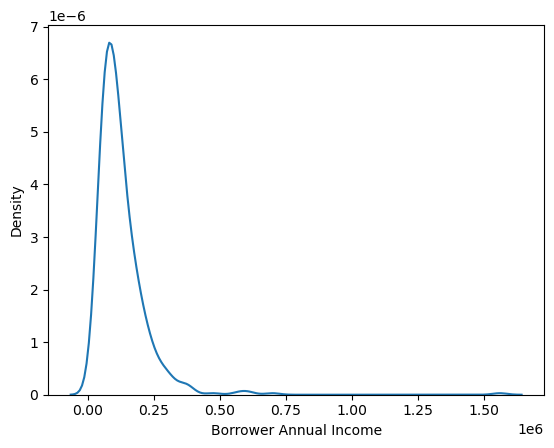

In [160]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [161]:
newDataSet[5:20]

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
5,5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
7,7,8,53,39.06,74600,392000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
8,8,9,36,98.09,96500,58000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
9,9,10,48,41.47,80000,170000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
10,10,11,34,40.18,96500,182000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
11,11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
12,12,13,6,84.75,127900,88000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
13,13,14,26,33.01,79700,593000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
14,14,15,6,34.80,127900,297000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [162]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [163]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [164]:
cat=pd.qcut(dataSet["Borrower Annual Income"],q=4)
print(cat)


0       (105500.0, 155250.0]
1      (155250.0, 1560000.0]
2       (17999.999, 69750.0]
3       (105500.0, 155250.0]
4       (105500.0, 155250.0]
               ...          
495    (155250.0, 1560000.0]
496      (69750.0, 105500.0]
497    (155250.0, 1560000.0]
498     (105500.0, 155250.0]
499     (17999.999, 69750.0]
Name: Borrower Annual Income, Length: 500, dtype: category
Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]]


In [165]:
type(dataSet["Borrower Annual Income"])

pandas.core.series.Series

In [166]:
income_data=pd.concat([newDataSet["Borrower Annual Income"], cat], axis=1)
income_data.columns=["Income", "Category"]
income_data

,Income,Category
0,123000,"(105500.0, 155250.0]"
1,250000,"(155250.0, 1560000.0]"
2,64000,"(17999.999, 69750.0]"
3,141000,"(105500.0, 155250.0]"
4,109000,"(105500.0, 155250.0]"
...,...,...
495,275000,"(155250.0, 1560000.0]"
496,79000,"(69750.0, 105500.0]"
497,187000,"(155250.0, 1560000.0]"
498,109000,"(105500.0, 155250.0]"


In [167]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

C:\Users\kunal\AppData\Local\Temp\ipykernel_47620\1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')])

In [168]:
keys=grouped.groups.keys()
keys=list(keys)
print("list of keys", keys)
import numpy as np
keys=np.array(keys)
print('arrays', keys)
keys=keysArray.reshape((2,2))
keys

list of keys [Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')]
arrays [Interval(17999.999, 69750.0, closed='right')
 Interval(69750.0, 105500.0, closed='right')
 Interval(105500.0, 155250.0, closed='right')
 Interval(155250.0, 1560000.0, closed='right')]


NameError: name 'keysArray' is not defined

In [169]:
grouped.groups

{(17999.999, 69750.0]: [2, 8, 11, 25, 26, 43, 44, 49, 56, 59, 60, 77, 85, 94, 97, 100, 104, 109, 112, 119, 125, 126, 127, 128, 133, 136, 149, 152, 158, 166, 182, 191, 195, 200, 204, 213, 220, 224, 240, 243, 244, 251, 257, 258, 262, 268, 271, 272, 273, 275, 280, 284, 285, 291, 293, 305, 306, 309, 313, 314, 315, 317, 318, 319, 323, 325, 332, 335, 337, 338, 339, 341, 342, 347, 350, 352, 356, 359, 360, 361, 362, 364, 367, 370, 374, 376, 384, 385, 387, 389, 392, 407, 408, 414, 417, 418, 420, 421, 423, 424, ...], (69750.0, 105500.0]: [12, 17, 21, 28, 30, 32, 34, 35, 50, 53, 57, 58, 66, 68, 80, 81, 83, 88, 90, 96, 99, 102, 103, 106, 118, 122, 123, 135, 138, 143, 144, 146, 160, 161, 162, 165, 168, 169, 180, 183, 186, 190, 198, 201, 205, 209, 210, 217, 221, 223, 229, 233, 234, 245, 246, 248, 253, 255, 256, 259, 260, 263, 264, 266, 282, 283, 286, 287, 289, 294, 296, 298, 299, 300, 301, 310, 320, 326, 327, 329, 330, 331, 333, 351, 355, 377, 382, 383, 393, 399, 400, 403, 404, 411, 412, 419, 422, 4

In [170]:
grouped.get_group(pd.Interval(17999.999, 69750.0, closed='right'))

,Income,Category
2,64000,"(17999.999, 69750.0]"
8,58000,"(17999.999, 69750.0]"
11,64000,"(17999.999, 69750.0]"
25,54000,"(17999.999, 69750.0]"
26,26000,"(17999.999, 69750.0]"
...,...,...
479,38000,"(17999.999, 69750.0]"
484,47000,"(17999.999, 69750.0]"
485,64000,"(17999.999, 69750.0]"
486,62000,"(17999.999, 69750.0]"


In [171]:
keys=keys.reshape((2,2))
print(keys)

[[Interval(17999.999, 69750.0, closed='right')
  Interval(69750.0, 105500.0, closed='right')]
 [Interval(105500.0, 155250.0, closed='right')
  Interval(155250.0, 1560000.0, closed='right')]]


THe axes object has [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
outer array is  0
THe index of inner array is  0
THe index of inner array is  1
outer array is  1
THe index of inner array is  0


C:\Users\kunal\AppData\Local\Temp\ipykernel_47620\2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
C:\Users\kunal\AppData\Local\Temp\ipykernel_47620\2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
C:\Users\kunal\AppData\Local\Temp\ipykernel_47620\2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()


THe index of inner array is  1


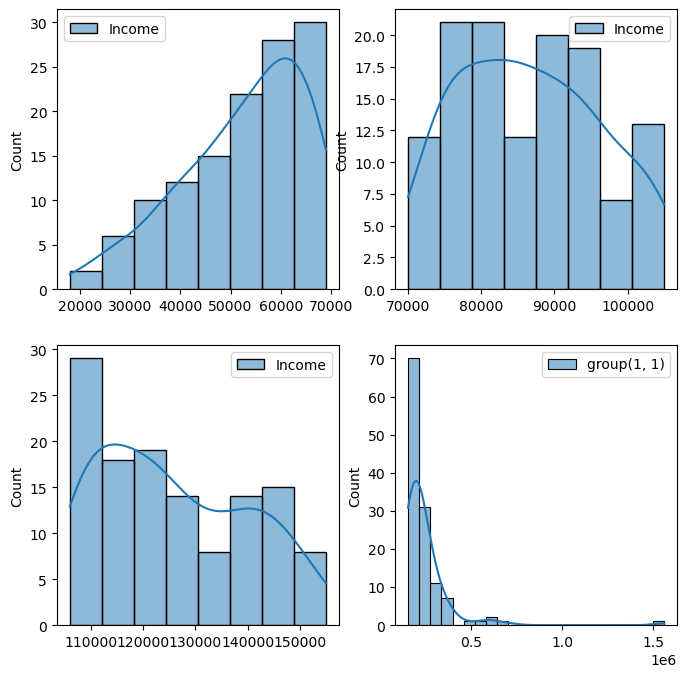

In [172]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [173]:
second_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


the min of 1st group is Income                    70000
Category    (69750.0, 105500.0]
dtype: object the max is  Income                   105000
Category    (69750.0, 105500.0]
dtype: object 

the min of 1st group is Income                    70000
Category    (69750.0, 105500.0]
dtype: object the max is  Income                   105000
Category    (69750.0, 105500.0]
dtype: object 

the min of 1st group is Income                    106000
Category    (105500.0, 155250.0]
dtype: object the max is  Income                    155000
Category    (105500.0, 155250.0]
dtype: object 

the min of 1st group is Income                     156000
Category    (155250.0, 1560000.0]
dtype: object the max is  Income                    1560000
Category    (155250.0, 1560000.0]
dtype: object 



In [174]:
import math
#math.sqrt(second_group.var())

In [175]:
pd.DataFrame(second_group).info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 12 to 496
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Income    125 non-null    int64   
 1   Category  125 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.5 KB


In [176]:
second_group
#second_group=second_group.astype(float)

,Income,Category
12,88000,"(69750.0, 105500.0]"
17,76000,"(69750.0, 105500.0]"
21,93000,"(69750.0, 105500.0]"
28,103000,"(69750.0, 105500.0]"
30,76000,"(69750.0, 105500.0]"
...,...,...
490,97000,"(69750.0, 105500.0]"
491,95000,"(69750.0, 105500.0]"
492,70000,"(69750.0, 105500.0]"
493,104000,"(69750.0, 105500.0]"


In [177]:
emperical_stats=second_group.describe()
emperical_stats

,Income
count,125.000000
mean,86624.000000
std,9720.832302
min,70000.000000
25%,78000.000000
50%,86000.000000
75%,94000.000000
max,105000.000000


In [178]:
#fourth_group=fourth_group.astype(float)
#fourth_group.describe()

In [179]:
cv_second_group=second_group["Income"].std()/second_group["Income"].mean() *100
cv_second_group

np.float64(11.221869576653082)

In [180]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

(0.0, 400000.0)

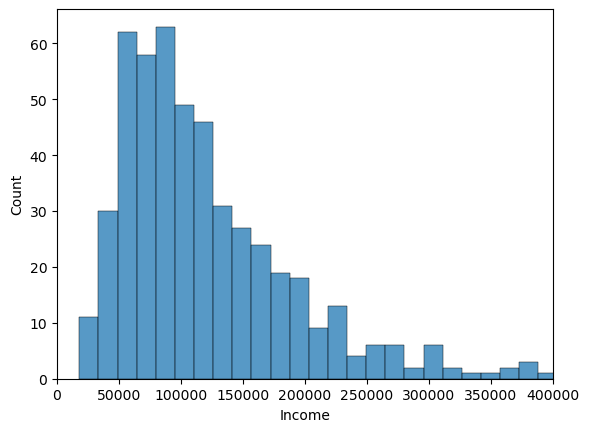

In [181]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)

In [182]:
dataSet[dataSet["Borrower Annual Income"]<80000]

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
2,2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
8,8,9,36,98.09,96500,58000,0.601,2,< 25,41,455000,185000,40.64,180,3.62
11,11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80,360,4.62
17,17,18,13,53.46,52400,76000,1.4504,2,< 25,42,255000,145000,58.39,180,3.5
25,25,26,26,8.94,79000,54000,0.6835,2,< 25,43,295000,235000,80,360,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,487,22,31.96,54400,62000,1.1397,2,> 74,45,355000,285000,79.63,360,2.75
489,489,490,26,40.65,101500,75000,0.7389,2,> 74,45,265000,245000,94.82,360,3.37
492,492,493,6,44.8,102700,70000,0.6816,2,> 74,45,655000,145000,22.41,120,2.5
496,496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3


In [183]:
# 3:- Let the journey Begin 

In [184]:
# let us use the regression model to see the best attributes
dataSet.columns


Index(['Column1', 'Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

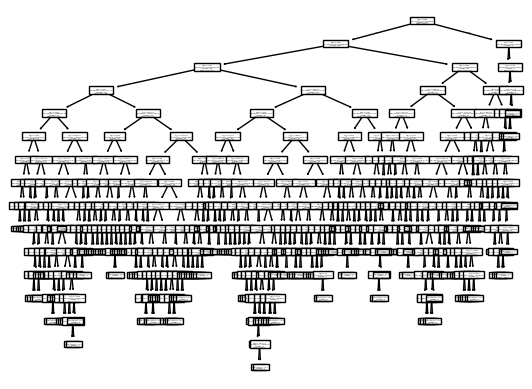

In [185]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income", "Age of Borrower"],axis=1)
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)
plot_tree(model)
myplot.show()



In [186]:
X_train[:2]

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
249,249,250,12,25.71,68300,3.7482,2,20,785000,195000,25.29,120,2.75
433,433,434,47,25.68,80700,1.0409,2,10,275000,215000,80,360,2.99


In [187]:
from sklearn.tree import export_text
tree_rules= export_text(model, feature_names=X_train.columns)


In [188]:
#X_train.groupby("Borrower Income Ratio").groups

In [189]:
X_train

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
249,249,250,12,25.71,68300,3.7482,2,20,785000,195000,25.29,120,2.75
433,433,434,47,25.68,80700,1.0409,2,10,275000,215000,80,360,2.99
19,19,20,6,65.52,75000,4.6933,2,30,755000,505000,68,360,4.12
322,322,323,22,14.2,62800,1.9904,2,30,365000,285000,79,360,3.25
332,332,333,36,2.7,71700,0.6834,2,37,155000,135000,95,360,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,107,19,9.65,80600,1.0174,2,46,295000,235000,80.99,360,2.87
270,270,271,41,19.44,92100,1.3029,2,30,475000,375000,78.94,180,1.99
348,348,349,26,10.69,79700,2.0828,2,36,445000,335000,74.6,360,4.87
435,435,436,27,10.22,95600,6.4017,2,10,175000,75000,45.31,180,3.25


In [190]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    random_state=42
)

print(X_train)
model.fit(X_train, y_train)


0   Borrower Income Ratio LTV Ratio
249                3.7482     25.29
433                1.0409        80
19                 4.6933        68
322                1.9904        79
332                0.6834        95
..                    ...       ...
106                1.0174     80.99
270                1.3029     78.94
348                2.0828      74.6
435                6.4017     45.31
102                0.8846     44.72

[400 rows x 2 columns]


,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [191]:
rules=export_text(model, feature_names=X_train.columns)
print(rules)


|--- Borrower Income Ratio <= 5.83
|   |--- Borrower Income Ratio <= 1.83
|   |   |--- Borrower Income Ratio <= 1.06
|   |   |   |--- Borrower Income Ratio <= 0.72
|   |   |   |   |--- value: [51541.67]
|   |   |   |--- Borrower Income Ratio >  0.72
|   |   |   |   |--- value: [77380.43]
|   |   |--- Borrower Income Ratio >  1.06
|   |   |   |--- Borrower Income Ratio <= 1.49
|   |   |   |   |--- value: [105115.79]
|   |   |   |--- Borrower Income Ratio >  1.49
|   |   |   |   |--- value: [141000.00]
|   |--- Borrower Income Ratio >  1.83
|   |   |--- Borrower Income Ratio <= 2.86
|   |   |   |--- LTV Ratio <= 38.57
|   |   |   |   |--- value: [279500.00]
|   |   |   |--- LTV Ratio >  38.57
|   |   |   |   |--- value: [183200.00]
|   |   |--- Borrower Income Ratio >  2.86
|   |   |   |--- Borrower Income Ratio <= 3.95
|   |   |   |   |--- value: [266473.68]
|   |   |   |--- Borrower Income Ratio >  3.95
|   |   |   |   |--- value: [379000.00]
|--- Borrower Income Ratio >  5.83
|   |---

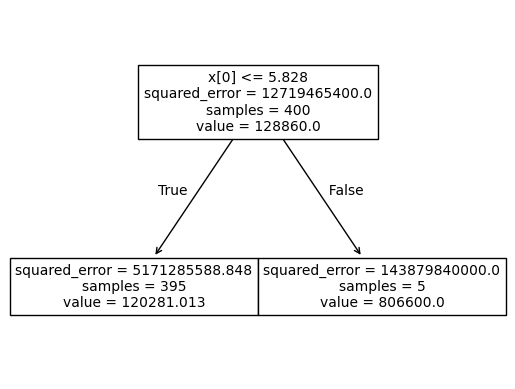

|--- Borrower Income Ratio <= 5.83
|   |--- value: [120281.01]
|--- Borrower Income Ratio >  5.83
|   |--- value: [806600.00]



In [192]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=1,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

Index(['Column1', 'Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)


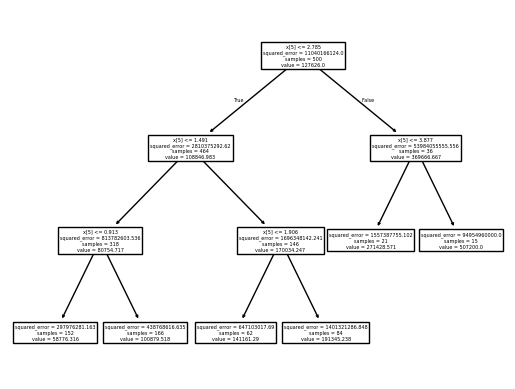

|--- Borrower Income Ratio <= 2.79
|   |--- Borrower Income Ratio <= 1.49
|   |   |--- Borrower Income Ratio <= 0.91
|   |   |   |--- value: [58776.32]
|   |   |--- Borrower Income Ratio >  0.91
|   |   |   |--- value: [100879.52]
|   |--- Borrower Income Ratio >  1.49
|   |   |--- Borrower Income Ratio <= 1.91
|   |   |   |--- value: [141161.29]
|   |   |--- Borrower Income Ratio >  1.91
|   |   |   |--- value: [191345.24]
|--- Borrower Income Ratio >  2.79
|   |--- Borrower Income Ratio <= 3.88
|   |   |--- value: [271428.57]
|   |--- Borrower Income Ratio >  3.88
|   |   |--- value: [507200.00]



In [193]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income","Age of Borrower"], axis=1)
y=dataSet["Borrower Annual Income"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [194]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[feature>3.88]
right_tree=target[(feature>2.79) & (feature<=3.88)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

1     250000
36    232000
47    173000
70    306000
74    259000
Name: Borrower Annual Income, dtype: object
The length of right tree is  22
The length of left tree is  14
the mean 523642.85714285716
the mean 271681.8181818182
The left Variance is  105195939560.43954
The right Variance is  1558798701.298701
The parent variance is  11062290705.410822


In [195]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[(feature>1.49) & (feature<=1.91)]
right_tree=target[(feature>1.91) & (feature<=2.79)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

5     255000
9     170000
14    297000
15    204000
16    214000
Name: Borrower Annual Income, dtype: object
The length of right tree is  84
The length of left tree is  62
the mean 141161.29032258064
the mean 191345.2380952381
The left Variance is  657711263.8815442
The right Variance is  1418204675.8462422
The parent variance is  11062290705.410822


In [196]:
v_parent=target.var()

In [197]:
right_tree_var=(22/36)*right_tree.var()

right_tree_var

np.float64(866680635.2393703)

In [198]:
left_tree_var=(14/36)* left_tree.var()
left_tree_var

np.float64(255776602.62060055)

In [199]:
v_red_perc=( v_parent- (right_tree_var + left_tree_var) ) / v_parent
v_red_perc

np.float64(0.898533019267795)

In [200]:
# The above number does not make sense without calculating the variance percentange reduction
# v_reduced= (v_parent - v_after)/ v_parent
v_parent=target.var()
v_after= (176/380 * right_tree.var() )+ (204/380 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

np.float64(90.87042802957286)

In [201]:
v_parent=target.var()
v_after= (85/115 * right_tree.var() )+ (30/115 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

np.float64(88.9732142953025)

In [202]:
new_data=dataSet[dataSet["Borrower Income Ratio" ]>  3.88][["Borrower Income Ratio","Borrower Annual Income"]]

In [203]:
new_data

,Borrower Income Ratio,Borrower Annual Income
7,5.2547,392000
13,7.4404,593000
19,4.6933,352000
67,4.3823,376000
95,4.8668,475000
129,4.7103,374000
261,4.4326,375000
288,3.906,266000
353,7.867,568000
358,4.0022,371000


Index(['Column1', 'Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'First Time Buyer? (1=Yes, 2=No)', 'Borrower Debt to Income Ratio',
       'Appraised Value of Home', 'Amount Borrowed', 'LTV Ratio',
       'Length of Mortgage in Months', 'Mortgage Interest Rate'],
      dtype='object', name=0)


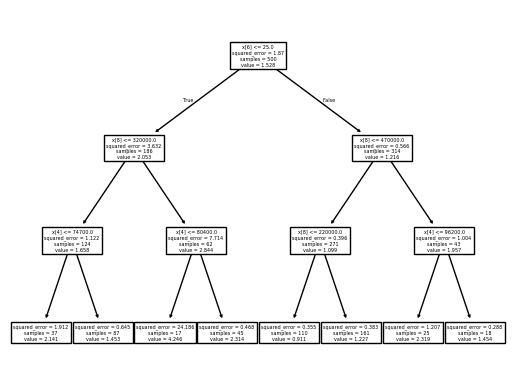

|--- Borrower Debt to Income Ratio <= 25.00
|   |--- Amount Borrowed <= 320000.00
|   |   |--- Median Family Income in Local Area <= 74700.00
|   |   |   |--- value: [2.14]
|   |   |--- Median Family Income in Local Area >  74700.00
|   |   |   |--- value: [1.45]
|   |--- Amount Borrowed >  320000.00
|   |   |--- Median Family Income in Local Area <= 80400.00
|   |   |   |--- value: [4.25]
|   |   |--- Median Family Income in Local Area >  80400.00
|   |   |   |--- value: [2.31]
|--- Borrower Debt to Income Ratio >  25.00
|   |--- Amount Borrowed <= 470000.00
|   |   |--- Amount Borrowed <= 220000.00
|   |   |   |--- value: [0.91]
|   |   |--- Amount Borrowed >  220000.00
|   |   |   |--- value: [1.23]
|   |--- Amount Borrowed >  470000.00
|   |   |--- Median Family Income in Local Area <= 96200.00
|   |   |   |--- value: [2.32]
|   |   |--- Median Family Income in Local Area >  96200.00
|   |   |   |--- value: [1.45]



In [204]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Income Ratio","Age of Borrower","Borrower Annual Income"], axis=1)
y=dataSet["Borrower Income Ratio"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [205]:
data_for_clustering=dataSet.drop(["Age of Borrower"], axis=1)
data_for_clustering

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,0,1,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,1,2,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5
3,3,4,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25
4,4,5,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62
496,496,497,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3
497,497,498,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87
498,498,499,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62


In [206]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_for_clustering)
data_for_clustering['cluster']=kmeans.labels_
data_for_clustering

C:\Users\kunal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kunal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\kunal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\kunal\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
0,0,1,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,2
1,1,2,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,0
2,2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
3,3,4,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,0
4,4,5,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,0
496,496,497,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,2
497,497,498,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,2
498,498,499,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,0


In [207]:
clusters=data_for_clustering.groupby(by="cluster")
clusters.groups

{0: [1, 3, 6, 9, 11, 12, 13, 16, 18, 19, 22, 23, 24, 27, 29, 34, 36, 39, 41, 42, 46, 54, 55, 57, 63, 67, 73, 74, 88, 89, 90, 91, 93, 95, 103, 107, 113, 116, 117, 120, 122, 128, 130, 132, 135, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 151, 157, 158, 159, 170, 174, 175, 177, 178, 180, 181, 185, 188, 192, 194, 196, 197, 198, 200, 206, 207, 209, 211, 212, 213, 214, 217, 218, 219, 222, 225, 226, 228, 230, 234, 236, 237, 238, 239, 241, 245, 247, 249, 252, 253, ...], 1: [5, 14, 62, 70, 72, 76, 78, 84, 102, 114, 131, 162, 163, 167, 216, 229, 231, 235, 242, 261, 311, 334, 340, 363, 369, 373, 381, 401, 410, 457, 473, 478], 2: [0, 2, 4, 7, 8, 10, 15, 17, 20, 21, 25, 26, 28, 30, 31, 32, 33, 35, 37, 38, 40, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 56, 58, 59, 60, 61, 64, 65, 66, 68, 69, 71, 75, 77, 79, 80, 81, 82, 83, 85, 86, 87, 92, 94, 96, 97, 98, 99, 100, 101, 104, 105, 106, 108, 109, 110, 111, 112, 115, 118, 119, 121, 123, 124, 125, 126, 127, 129, 133, 134, 136, 138, 144, 149, 150, 152, 

In [208]:
second_cluster=clusters.get_group(0)
second_cluster


,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
1,1,2,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,0
3,3,4,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,0
6,6,7,8,81.63,100000,145000,1.45,1,30,475000,395000,85,180,2.12,0
9,9,10,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,0
11,11,12,25,41.27,114000,64000,0.5614,2,44,465000,365000,80,360,4.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,491,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,0
492,492,493,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,0
494,494,495,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,0
495,495,496,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,0


In [209]:
second_cluster=clusters.get_group(1)
second_cluster



,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
5,5,6,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
14,14,15,6,34.8,127900,297000,2.3221,2,20,955000,765000,80,360,3.5,1
62,62,63,6,29.96,83300,192000,2.3049,2,20,965000,585000,60.2,360,3.37,1
70,70,71,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
72,72,73,53,24.46,106900,124000,1.16,2,30,865000,495000,57.66,360,3.5,1
76,76,77,6,59.79,83300,212000,2.545,2,20,835000,545000,65.62,360,3.5,1
78,78,79,53,21.32,106900,115000,1.0758,2,42,955000,485000,56.1,360,3.37,1
84,84,85,6,37.36,83300,184000,2.2089,2,48,995000,505000,51.04,240,2.5,1
102,102,103,6,51.32,92700,82000,0.8846,2,47,995000,445000,44.72,360,2.37,1
114,114,115,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,1


In [210]:
third_cluster=clusters.get_group(2)
print(third_cluster.shape)
third_cluster



(307, 15)


,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
0,0,1,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,2
2,2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
4,4,5,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,2
7,7,8,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,2
8,8,9,36,98.09,96500,58000,0.601,2,41,455000,185000,40.64,180,3.62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,492,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62,2
493,493,494,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,2
496,496,497,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,2
497,497,498,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,2


In [211]:
kmeans.cluster_centers_

array([[2.30031056e+02, 2.31031056e+02, 2.34472050e+01, 3.30779503e+01,
        9.11024845e+04, 1.73397516e+05, 2.00701242e+00, 1.95031056e+00,
        3.07329193e+01, 5.95062112e+05, 3.98291925e+05, 6.89608075e+01,
        3.31304348e+02, 3.15776398e+00],
       [2.31375000e+02, 2.32375000e+02, 1.67187500e+01, 3.90287500e+01,
        9.90937500e+04, 1.89093750e+05, 1.98239688e+00, 1.93750000e+00,
        2.97187500e+01, 1.09968750e+06, 5.36875000e+05, 5.15709375e+01,
        3.24375000e+02, 3.07125000e+00],
       [2.61599349e+02, 2.62599349e+02, 2.74364821e+01, 2.47053746e+01,
        8.08195440e+04, 9.72149837e+04, 1.22903225e+00, 1.85016287e+00,
        3.01270358e+01, 2.81384365e+05, 2.01091205e+05, 7.35977199e+01,
        3.18371336e+02, 3.29280130e+00]])

In [212]:
data_for_clustering.groupby(by="cluster").mean()

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
cluster,,,,,,,,,,,,,,
0,230.031056,231.031056,23.447205,33.07795,91102.484472,173397.515528,2.007012,1.950311,30.732919,595062.111801,398291.925466,68.960807,331.304348,3.157764
1,231.375,232.375,16.71875,39.02875,99093.75,189093.75,1.982397,1.9375,29.71875,1099687.5,536875.0,51.570938,324.375,3.07125
2,261.599349,262.599349,27.436482,24.705375,80819.543974,97214.983713,1.229032,1.850163,30.127036,281384.364821,201091.205212,73.59772,318.371336,3.292801


In [213]:
from sklearn.cluster import KMeans
new_data_for_cluster=dataSet.drop(["Borrower ID Number","Age of Borrower"], axis=1)
new_kmeans=KMeans( random_state=42)
new_kmeans.fit(new_data_for_cluster)
new_kmeans.cluster_centers_

new_data_for_cluster["clusters"]=new_kmeans.labels_
new_kmeans.n_clusters

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


8

In [214]:
new_data_for_cluster.groupby("clusters").mean()

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
clusters,,,,,,,,,,,,,
0,249.640244,27.335366,26.171037,82319.512195,104359.756098,1.314004,1.859756,29.310976,308780.487805,227012.195122,75.281341,325.97561,3.269146
1,229.107143,18.571429,35.698929,98000.0,181357.142857,1.898229,1.964286,30.75,911071.428571,552500.0,61.429643,334.285714,3.107143
2,289.019417,28.281553,23.173689,77271.84466,73077.669903,0.961279,1.834951,31.514563,188883.495146,128495.145631,72.146893,315.145631,3.407864
3,253.269231,15.230769,42.243077,95157.692308,113692.307692,1.24485,2.0,33.384615,757307.692308,307307.692308,41.521538,300.0,2.891154
4,321.0,18.888889,32.237778,93355.555556,205111.111111,2.244989,1.888889,32.333333,1456111.111111,566111.111111,41.656667,313.333333,2.941111
5,215.815385,21.953846,34.035231,93435.384615,196984.615385,2.180288,1.938462,29.292308,631923.076923,466846.153846,75.113538,348.923077,3.280308
6,225.25,26.81,27.3998,86671.0,124540.0,1.486709,1.9,30.91,458000.0,320900.0,71.5344,314.4,3.1124
7,319.6,28.6,27.956,78400.0,806600.0,10.65186,2.0,16.0,421000.0,317000.0,71.974,288.0,3.464


In [215]:
second=new_data_for_cluster.groupby(by='clusters').get_group(0)
second

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
7,7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
15,15,24,67.43,104000,204000,1.9615,2,30,385000,175000,65.11,180,2.87,0
21,21,49,20.03,85300,93000,1.0903,2,20,305000,235000,78.83,360,3.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,4,35.98,77800,100000,1.2853,2,30,245000,185000,79,360,3.99,0
485,485,6,22.09,66100,64000,0.9682,2,48,335000,265000,80,360,4.37,0
486,486,22,31.96,54400,62000,1.1397,2,45,355000,285000,79.63,360,2.75,0
489,489,26,40.65,101500,75000,0.7389,2,45,265000,245000,94.82,360,3.37,0


<Axes: ylabel='Borrower Income Ratio'>

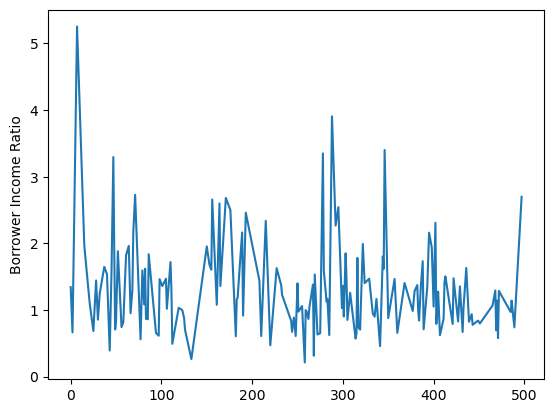

In [216]:
import seaborn as sns
sns.lineplot(second["Borrower Income Ratio"].sort_values())

In [217]:
a=second["Borrower Income Ratio"].sort_values().reset_index(drop=True)
a

0      0.2113
1      0.2626
2      0.3122
3      0.3909
4      0.4564
        ...  
159    3.2952
160    3.3489
161    3.4008
162     3.906
163    5.2547
Name: Borrower Income Ratio, Length: 164, dtype: object

<Axes: xlabel='Borrower Income Ratio', ylabel='Count'>

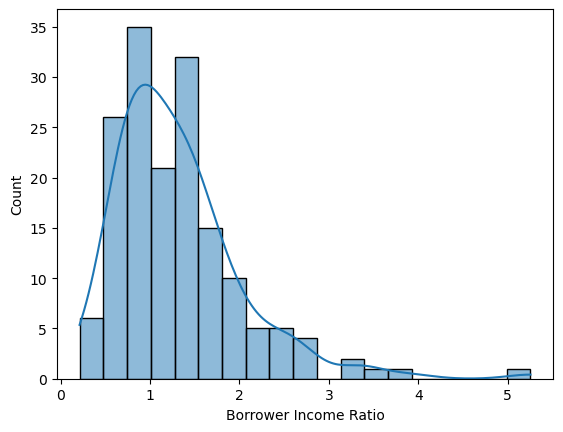

In [218]:
sns.histplot(second["Borrower Income Ratio"].sort_values().reset_index(drop=True), kde=True)

<Axes: xlabel='Borrower Income Ratio', ylabel='Count'>

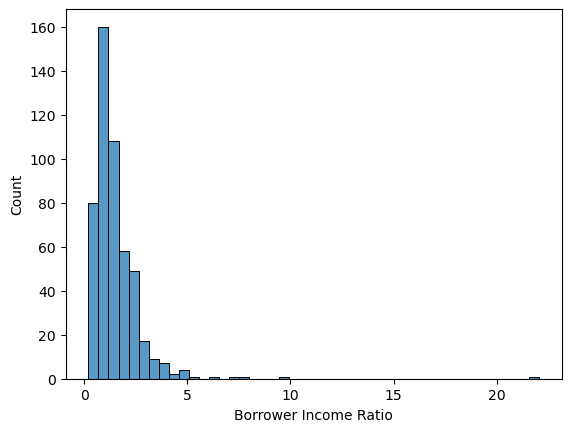

In [219]:
sns.histplot(dataSet["Borrower Income Ratio"].sort_values().reset_index(drop=True) )

<Axes: xlabel='Borrower Income Ratio', ylabel='Count'>

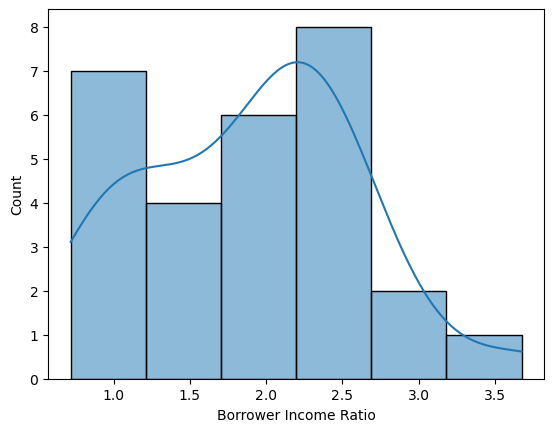

In [220]:
sns.histplot(new_data_for_cluster.groupby(by='clusters').get_group(1)["Borrower Income Ratio"].reset_index(drop=True),kde= True)

In [221]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [222]:
new_data_for_cluster

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,5
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,3
4,4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,5
496,496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,6
497,497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0
498,498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,6


In [223]:
data_for_clustering.columns

Index(['Column1', 'Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Borrower Debt to Income Ratio',
       'Appraised Value of Home', 'Amount Borrowed', 'LTV Ratio',
       'Length of Mortgage in Months', 'Mortgage Interest Rate', 'cluster'],
      dtype='object', name=0)

In [224]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia1=[]
K =range(1,16)
data1=data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia1.append(kmean.inertia_)
print(inertia1)

[47312728101719.9, 20896521175965.168, 14788274978913.658, 11619344772381.043, 9923333555503.066, 7907121808197.374, 6903275949719.57, 6196299743052.909, 5844415106441.883, 5474603908685.124, 4663873176791.955, 4372310531945.6987, 4052705526620.5317, 3820771840315.759, 3661649868613.9023]


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [231]:
myplot.plot(pd.Series(inertia))

NameError: name 'inertia' is not defined

In [ ]:
pd.Series(inertia)

In [232]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia=[]

K =range(1,3)

for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia.append(kmean.inertia_)
print(inertia)
clusters=kmean.labels_

print(len(clusters))
k_five_means_data_set=data1
k_five_means_data_set["Cluster"]=clusters
k_five_means_data_set

[47312728101719.9, 20896521175965.168]
500


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
4,4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1
496,496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0
498,498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,1


In [233]:
# Now the task comes of cross checking these clusters(k=5) with the help of scatterplot where we will use PCA

In [234]:
k_five_means_data_set["Cluster"].value_counts()

Cluster
0    353
1    147
Name: count, dtype: int64

In [235]:
k=k_five_means_data_set
k[k["Cluster"]==1]

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
1,1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
5,5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
9,9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,1
12,12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,1
492,492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,1
494,494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,1
495,495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1


In [236]:
len(dataSet.columns)

15

In [237]:
len(data1.columns)

14

In [238]:
kmean.cluster_centers_

array([[2.54611898e+02, 2.76543909e+01, 2.53764306e+01, 8.18702550e+04,
        1.02490085e+05, 1.28071926e+00, 1.85835694e+00, 3.03257790e+01,
        3.05368272e+05, 2.18144476e+05, 7.34658357e+01, 3.18696884e+02,
        3.27566572e+00],
       [2.37224490e+02, 2.02108844e+01, 3.53819048e+01, 9.35367347e+04,
        1.87986395e+05, 2.12098435e+00, 1.95918367e+00, 3.02244898e+01,
        7.45476190e+05, 4.49217687e+05, 6.40409524e+01, 3.33061224e+02,
        3.13782313e+00]])

In [239]:
len(data1.columns)

14

In [240]:
k["Cluster"].value_counts()

Cluster
0    353
1    147
Name: count, dtype: int64

In [241]:
k_group=k.groupby(by="Cluster")
print(k_group.groups.keys())

dict_keys([0, 1])


In [242]:
second_cluster=k_group.get_group(0)
second_cluster

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
4,4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
6,6,8,81.63,100000,145000,1.45,1,30,475000,395000,85,180,2.12,0
7,7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62,0
493,493,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,0
496,496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0


In [243]:
second_cluster=k_group.get_group(1)
print(second_cluster.shape)
second_cluster

(147, 14)


,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
1,1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
5,5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
9,9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,1
12,12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,1
492,492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,1
494,494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,1
495,495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1


In [244]:
third_cluster=k_group.get_group(2)
print(third_cluster.shape)
third_cluster

KeyError: 2

In [245]:
fourth_cluster=k_group.get_group(3)
print(fourth_cluster.shape)
fourth_cluster

KeyError: 3

In [246]:
fifth_cluster=k_group.get_group(3)
print(fifth_cluster.shape)
fifth_cluster

KeyError: 3

In [247]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_for_pca=k_five_means_data_set.drop("Cluster", axis=1)
data_for_pca["Borrower Annual Income"]=dataSet["Borrower Annual Income"]
scalerd_data=scaler.fit_transform(data_for_pca)


In [248]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
scalered_data_pca=pca.fit_transform(scalerd_data)


In [249]:

pca.components_

array([[-0.12287979, -0.13112338,  0.13317412,  0.22212969,  0.45462113,
         0.39820243,  0.14992093, -0.14985877,  0.48426064,  0.45007208,
        -0.19163595, -0.03971812, -0.12278309],
       [-0.04498308,  0.17195526, -0.26523054, -0.36641233,  0.41640683,
         0.48783162, -0.0414289 , -0.38710813, -0.31345846, -0.247028  ,
         0.15982428, -0.08580847,  0.09313087]])

In [250]:
pca.components_

array([[-0.12287979, -0.13112338,  0.13317412,  0.22212969,  0.45462113,
         0.39820243,  0.14992093, -0.14985877,  0.48426064,  0.45007208,
        -0.19163595, -0.03971812, -0.12278309],
       [-0.04498308,  0.17195526, -0.26523054, -0.36641233,  0.41640683,
         0.48783162, -0.0414289 , -0.38710813, -0.31345846, -0.247028  ,
         0.15982428, -0.08580847,  0.09313087]])

In [251]:
pca.explained_variance_ratio_

array([0.21392339, 0.14699224])

In [252]:
scalered_data_pca.shape

(500, 2)

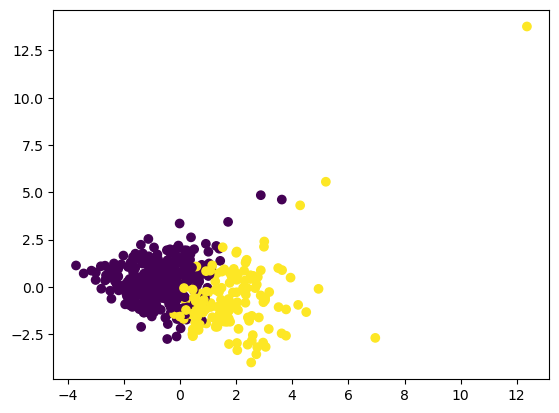

In [253]:
myplot.scatter(scalered_data_pca[:,0], scalered_data_pca[:,1], c=kmean.labels_)

In [254]:

k_second_cluster=second_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_second_cluster

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
1,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25
2,5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86
3,9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37
4,12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69
143,492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5
144,494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5
145,495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62


<Axes: ylabel='Frequency'>

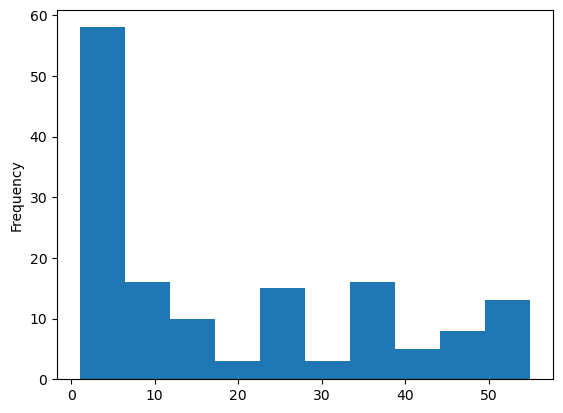

In [255]:
k_second_cluster["Wide Area Location Code"].plot(kind="hist")

<Axes: ylabel='Frequency'>

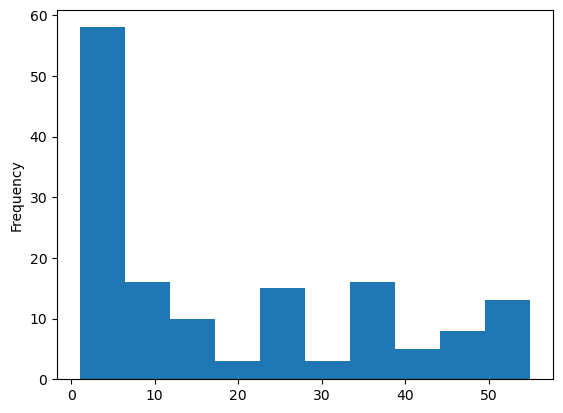

In [256]:
k_second_cluster=second_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_second_cluster["Wide Area Location Code"].plot(kind='hist')

In [257]:
k_second_cluster.columns

Index(['Column1', 'Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [258]:
k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
#k_third_cluster["Wide Area Location Code"].plot(kind='hist')
axes[0,0].plot(k_third_cluster["Wide Area Location Code"])
myplot.show()

KeyError: "['Cluster'] not found in axis"

KeyError: "['Cluster'] not found in axis"

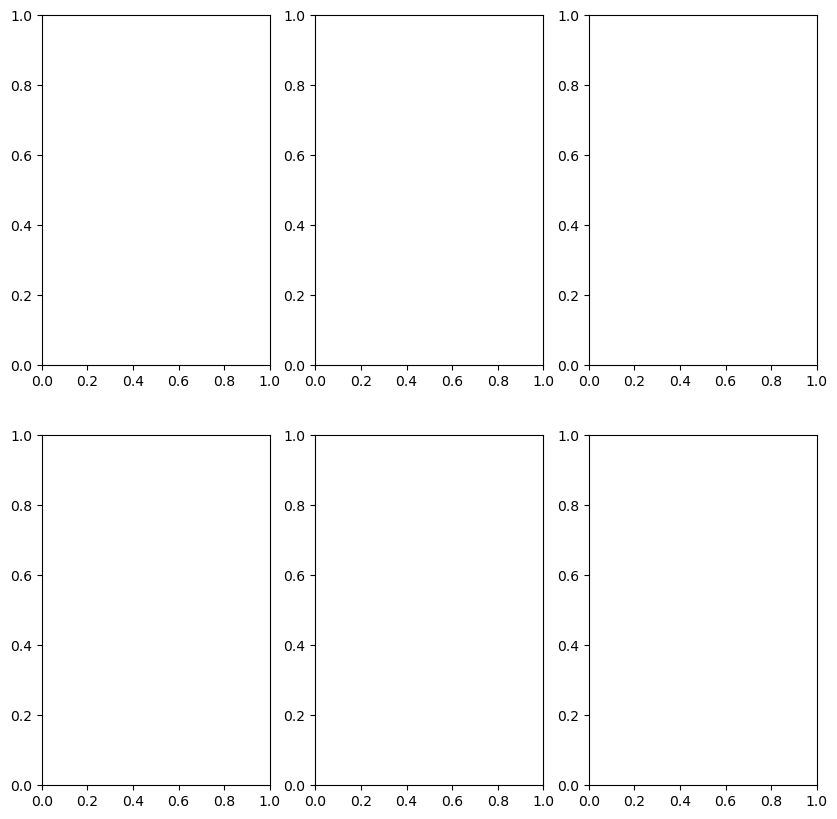

In [259]:
import seaborn as sns
fig, axes=myplot.subplots(2,3, figsize=(10,10))

k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fourth_cluster=fourth_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fifth_cluster=fifth_cluster.drop("Cluster",axis=1).reset_index(drop=True)

sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,0])

sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,1])
sns.histplot(data=k_third_cluster["Wide Area Location Code"], ax=axes[0,2])
sns.histplot(data=k_fourth_cluster["Wide Area Location Code"], ax=axes[1,0])
sns.histplot(data=k_fifth_cluster["Wide Area Location Code"], ax=axes[1,1])

myplot.show()

In [260]:
import seaborn as sns
sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,0])

<Axes: xlabel='Wide Area Location Code', ylabel='Count'>

KeyError: "['Cluster'] not found in axis"

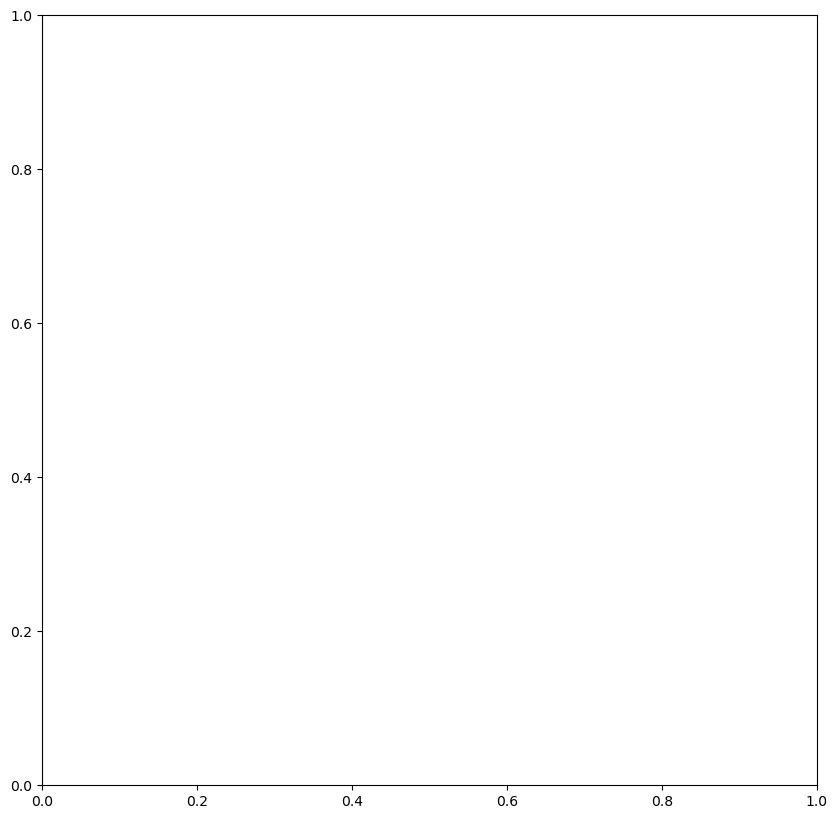

In [261]:
import seaborn as sns
fig, axes=myplot.subplots(1,1, figsize=(10,10))

k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fourth_cluster=fourth_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fifth_cluster=fifth_cluster.drop("Cluster",axis=1).reset_index(drop=True)


ax=sns.barplot(data=means, orient='h', label="%minority", color='yellow',height=0.2)
axes.legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()

NameError: name 'k_first_cluster' is not defined

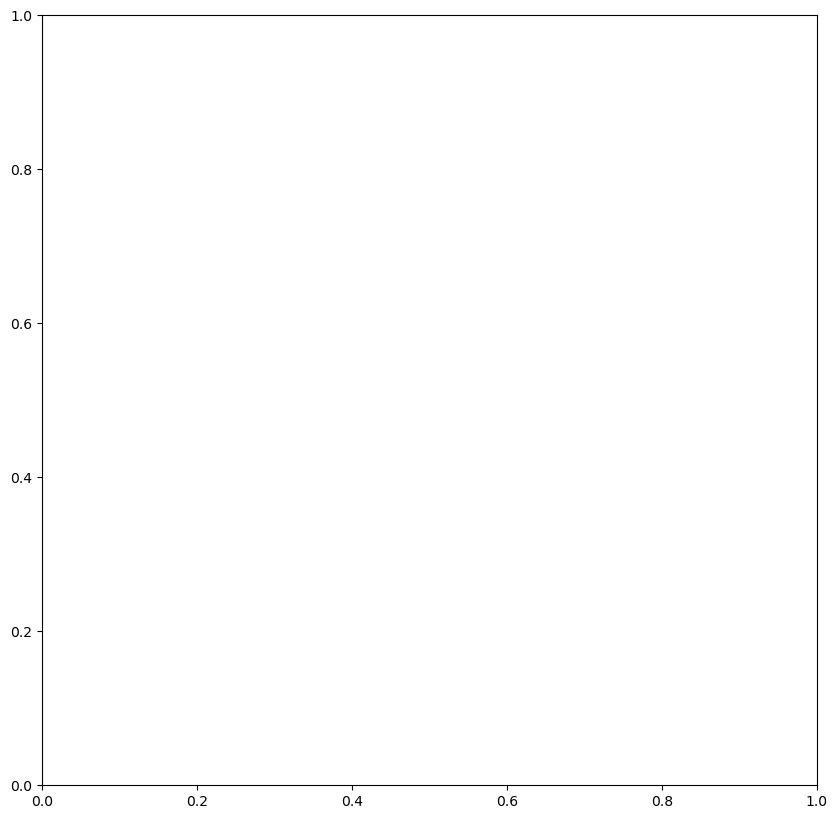

In [262]:
import seaborn as sns
fig, axes=myplot.subplots( figsize=(10,10))

minority_mean= k_first_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_first_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_first_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_first_cluster["Borrower Income Ratio"].mean()
dti=  k_first_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_first_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_first_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_first_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_first_cluster["Mortgage Interest Rate"].mean()
means=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series=pd.Series(means)
all_means_series.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]
print(all_means_series)

ax=sns.barplot(data=all_means_series, orient='h', label="First Group", color='yellow',height=0.4, ax=axes)
axes.legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()



% minority_mean                     35.381905
median_family_income_mean        93536.734694
borrower_annual_income          187986.394558
borrower_income_ratio                2.120984
dti                                 30.224490
appraised_home_value            745476.190476
LTV_ratio                           64.040952
length_of_mortgage_in_months       333.061224
mortgage_interest_rate               3.137823
dtype: float64


NameError: name 'k_first_cluster' is not defined

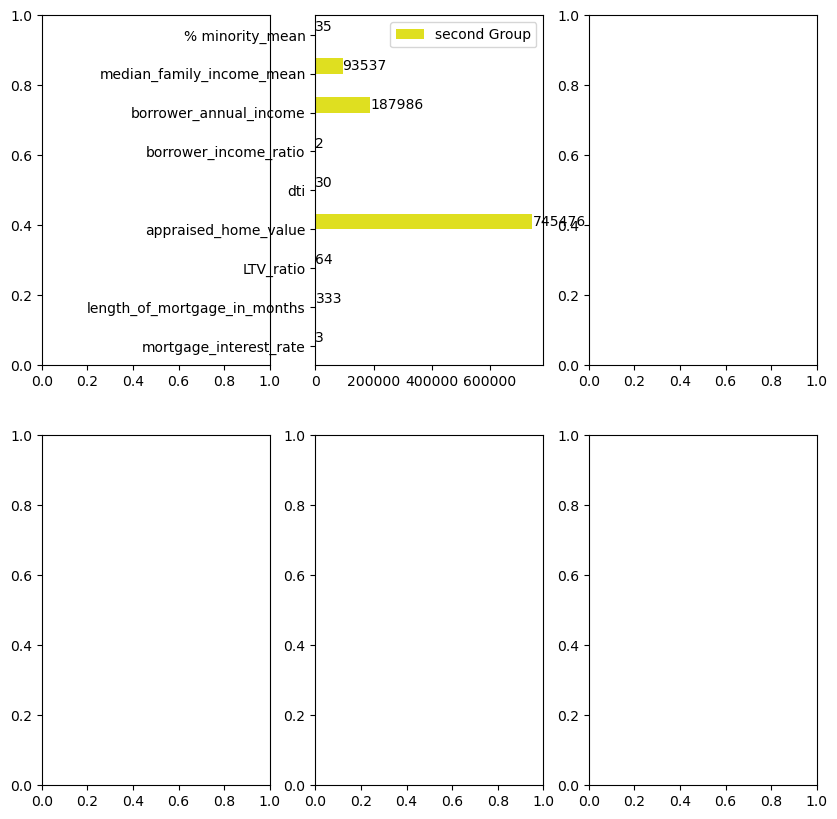

In [263]:
import seaborn as sns
fig, axes=myplot.subplots(2,3, figsize=(10,10))

minority_mean= k_second_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_second_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_second_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_second_cluster["Borrower Income Ratio"].mean()
dti=  k_second_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_second_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_second_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_second_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_second_cluster["Mortgage Interest Rate"].mean()
means=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series=pd.Series(means)
all_means_series.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]
print(all_means_series)

ax2=sns.barplot(data=all_means_series, orient='h', label="second Group", color='yellow',height=0.4, ax=axes[0,1])
axes[0,1].legend(loc='best')

for bar in ax2.patches:
    ax2.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )




minority_mean= k_first_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_first_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_first_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_first_cluster["Borrower Income Ratio"].mean()
dti=  k_first_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_first_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_first_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_first_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_first_cluster["Mortgage Interest Rate"].mean()
means1=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series1=pd.Series(means1)
all_means_series1.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]


ax1=sns.barplot(data=all_means_series, orient='h', label="First Group", color='yellow',height=0.4, ax=axes[1,2])
axes[1,2].legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()


In [ ]:
# New Professional Approach 

{'whiskers': [<matplotlib.lines.Line2D at 0x20db5ba9590>,
 'caps': [<matplotlib.lines.Line2D at 0x20db5ba9810>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db5ba9450>],
 'medians': [<matplotlib.lines.Line2D at 0x20db5ba9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db5ba9bd0>],
 'means': []}

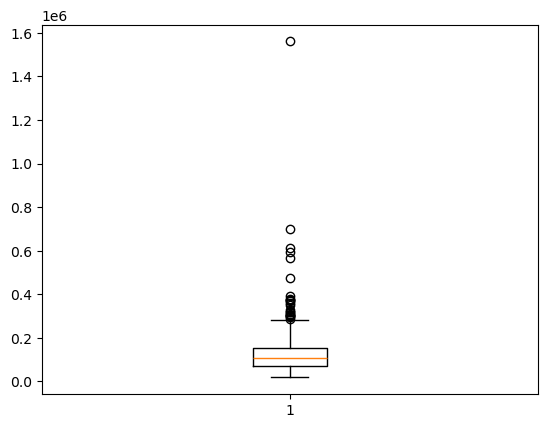

In [264]:
myplot.boxplot(data_for_clustering["Borrower Annual Income"])

In [265]:
new_data_for_clustering= data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
new_data_for_clustering

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25
4,4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62
496,496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3
497,497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87
498,498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62


In [266]:
from sklearn.preprocessing import StandardScaler
standardised_data_for_clustering=StandardScaler().fit_transform(new_data_for_clustering)
standardised_data_for_clustering=pd.DataFrame(standardised_data_for_clustering)


In [267]:
print(data_for_clustering["Wide Area Location Code"].mean())
print(standardised_data_for_clustering[1].mean())

25.466
-6.572520305780926e-17


In [268]:
standardised_data_for_clustering.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.136868e-16,-6.572520e-17,1.953993e-17,1.776357e-16,-7.105427e-18,4.263256e-17,3.304024e-16,2.842171e-17,0.000000,0.000000,2.060574e-16,-2.344791e-16,2.913225e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002,1.001002,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.728590e+00,-1.479577e+00,-1.134529e+00,-2.093460e+00,-1.043340e+00,-9.626638e-01,-2.815772e+00,-1.682822e+00,-1.579534,-1.880092,-3.499016e+00,-2.891469e+00,-2.475674e+00
25%,-8.642951e-01,-1.056253e+00,-7.546685e-01,-6.613517e-01,-5.508213e-01,-5.065079e-01,3.551424e-01,-8.536821e-01,-0.670757,-0.727898,-6.382152e-01,5.283642e-01,-6.621794e-01
50%,0.000000e+00,-2.818127e-02,-3.663505e-01,-1.268883e-01,-2.105790e-01,-2.194544e-01,3.551424e-01,-2.454253e-02,-0.295392,-0.151802,2.148334e-01,5.283642e-01,-2.088057e-01
75%,8.642951e-01,8.335851e-01,4.767846e-01,6.438810e-01,2.629049e-01,2.594434e-01,3.551424e-01,8.875110e-01,0.475093,0.640332,5.552770e-01,5.283642e-01,4.803221e-01
max,1.728590e+00,1.786064e+00,2.986949e+00,3.457347e+00,1.363228e+01,1.501800e+01,3.551424e-01,1.633737e+00,5.848735,3.448804,1.569745e+00,5.283642e-01,5.014058e+00


<Axes: ylabel='Borrower Annual Income'>

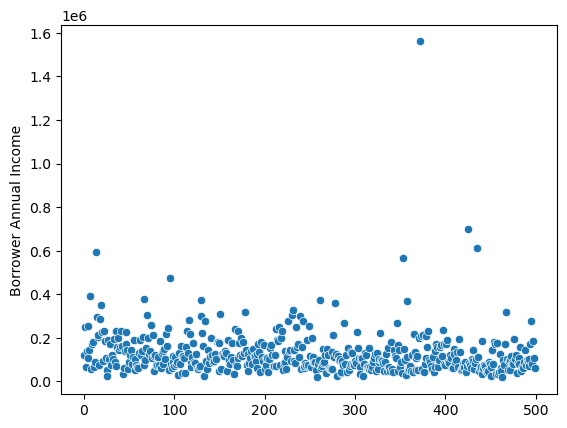

In [269]:
sns.scatterplot(new_data_for_cluster["Borrower Annual Income"])

In [270]:
# What is the best way to know or see whether there is an outlier in any attribute or entire data set at once?

{'whiskers': [<matplotlib.lines.Line2D at 0x20db5bc6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x20db5bc6c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db546a5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20db552d950>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db552da90>],
 'means': []}

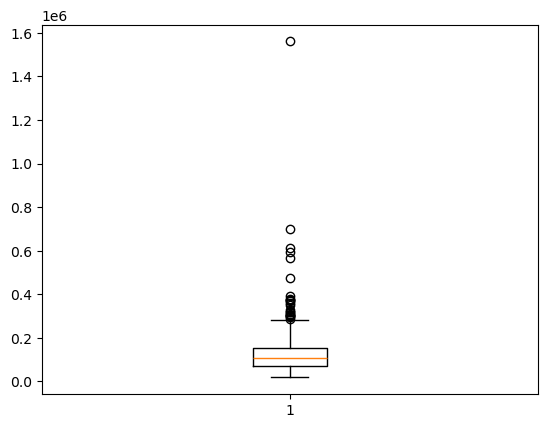

In [271]:
myplot.boxplot(new_data_for_cluster["Borrower Annual Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20db55b9d10>,
 'caps': [<matplotlib.lines.Line2D at 0x20db55b9f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db55b9bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20db55ba210>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db55ba350>],
 'means': []}

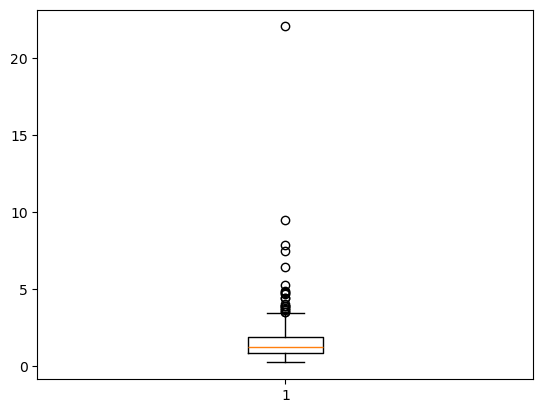

In [272]:
myplot.boxplot(new_data_for_cluster["Borrower Income Ratio"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20db56b07d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20db56b0a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db56b0690>],
 'medians': [<matplotlib.lines.Line2D at 0x20db56b0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db56b0e10>],
 'means': []}

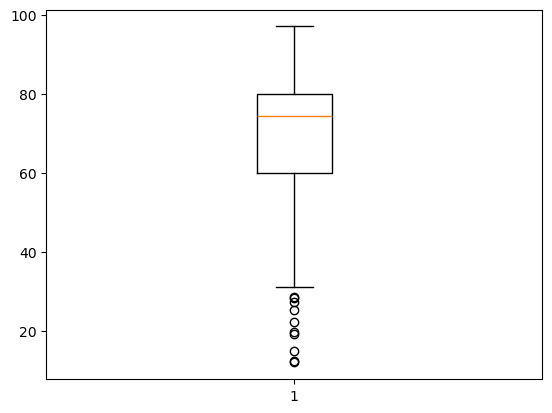

In [273]:
myplot.boxplot(new_data_for_cluster["LTV Ratio"])


In [274]:
new_data_for_cluster["LTV Ratio"][(new_data_for_cluster["LTV Ratio"]>=60)&(new_data_for_cluster["LTV Ratio"]<=80)].reset_index(drop=True)

0         80
1      71.44
2         60
3       65.6
4      79.44
       ...  
265       79
266       70
267    73.85
268    73.46
269       80
Name: LTV Ratio, Length: 270, dtype: object

In [275]:
small_ltv=new_data_for_cluster[(new_data_for_cluster["LTV Ratio"]>=1)&(new_data_for_cluster["LTV Ratio"]<=35)].reset_index(drop=True)
small_ltv

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
1,26,26,13.28,79000,26000,0.3291,2,39,165000,35000,19.35,360,3.87,2
2,94,4,22.68,77800,51000,0.6555,2,10,355000,95000,27.42,360,3.62,0
3,100,34,48.53,96500,69000,0.715,2,30,305000,105000,35,360,2.5,2
4,114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,4
5,122,6,80.94,92700,91000,0.9817,2,37,715000,225000,31.35,180,2.75,3
6,145,6,70.38,83300,127000,1.5246,2,20,805000,155000,19.75,360,3.12,3
7,162,6,75.54,127900,82000,0.6411,2,20,965000,305000,31.08,360,2.87,3
8,181,53,33.07,106900,125000,1.1693,2,30,765000,265000,35,180,2.5,3
9,235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,4


{'whiskers': [<matplotlib.lines.Line2D at 0x20db5c23110>,
 'caps': [<matplotlib.lines.Line2D at 0x20db5c23390>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db5c22fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20db5c23610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db5c23750>],
 'means': []}

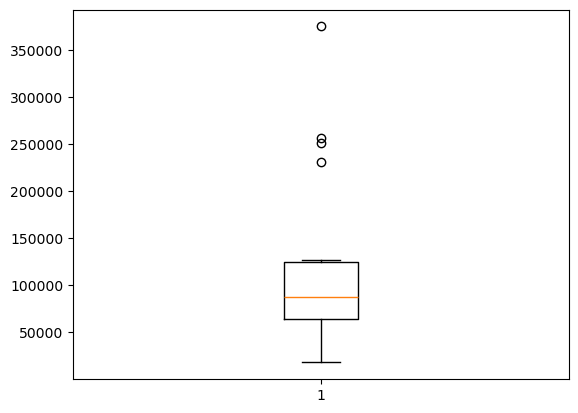

In [276]:
myplot.boxplot(small_ltv["Borrower Annual Income"])

In [277]:
new_data_for_cluster[new_data_for_cluster.loc[:,"Borrower Annual Income"]==new_data_for_cluster["Borrower Annual Income"].max()]

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
372,372,6,16.56,70700,1560000,22.0651,2,10,465000,325000,69.56,360,3.58,7


In [278]:
data_for_clustering.shape

(500, 15)

In [279]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca=data_for_clustering.drop("cluster", axis=1)

scalerd_data=scaler.fit_transform(new_data_for_pca)


In [280]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca=data_for_clustering.drop("cluster", axis=1)

scalerd_data=scaler.fit_transform(new_data_for_pca)

from sklearn.decomposition import PCA
pca2= PCA(n_components=11)
new_scalered_data=pca2.fit_transform(scalerd_data)


In [281]:
pca2.explained_variance_

array([2.8733854 , 1.9930955 , 1.88443305, 1.6721036 , 1.11348384,
       1.10434173, 0.8311556 , 0.80683714, 0.65756669, 0.57911751,
       0.45553639])

In [282]:
new_scalered_data

array([[ 9.40891358e-01, -2.60531669e+00, -1.03399535e+00, ...,
         1.09891025e+00, -1.22051983e+00,  9.33612360e-01],
       [ 2.69716339e+00, -3.38647950e-01, -7.36284184e-03, ...,
         8.58669540e-01,  2.00520710e-01, -6.36807622e-01],
       [ 6.02611697e-01, -2.08316362e+00, -3.40269144e+00, ...,
        -9.75355008e-01, -4.43294590e-01,  8.09779109e-01],
       ...,
       [-3.20883153e-01,  2.67630705e-04,  1.87516848e+00, ...,
        -2.60285204e-01,  3.86230656e-02, -2.50899674e-01],
       [-5.18422688e-01,  2.05374838e+00,  1.27360845e+00, ...,
         7.95802142e-01, -5.04738800e-01, -7.87023338e-01],
       [-2.10191699e+00,  2.23191075e+00,  5.89501585e-01, ...,
        -1.62593449e+00, -2.33375494e-01,  3.74463611e-02]],
      shape=(500, 11))

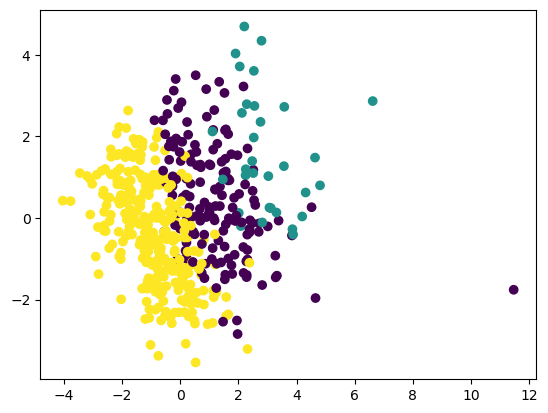

In [283]:

myplot.scatter(new_scalered_data[:,0], new_scalered_data[:,1], c=data_for_clustering["cluster"])

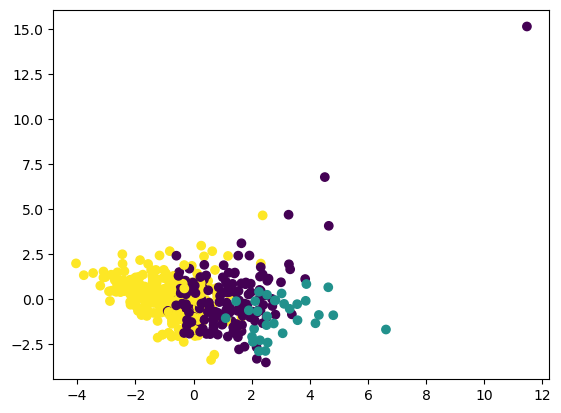

In [284]:
myplot.scatter(new_scalered_data[:,0], new_scalered_data[:,2], c=data_for_clustering["cluster"])

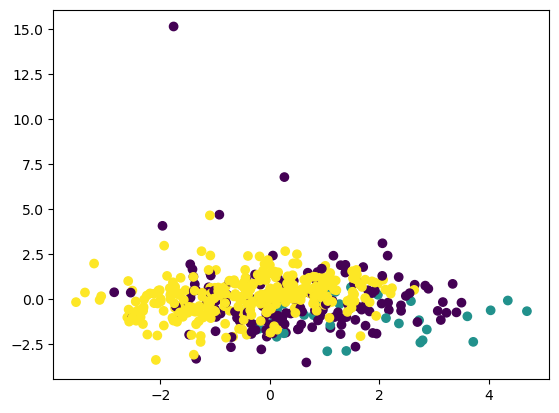

In [285]:
myplot.scatter(new_scalered_data[:,1], new_scalered_data[:,2], c=data_for_clustering["cluster"])


In [286]:

import numpy as np

data = new_data_for_cluster["Borrower Annual Income"]
np.percentile(data, 1)    # 1st percentile
np.percentile(data, 50)   # median
np.percentile(data, 99)

np.float64(475929.9999999991)

In [287]:
data.max()

1560000

In [288]:
import numpy as np

data = [40, 45, 48, 50, 52, 55, 60, 65, 70, 80]


np.percentile(data, 99)   # 99th percentile


np.float64(79.1)

### Let us Find the outliers for each column manually

In [289]:
q1=new_data_for_cluster["Borrower Income Ratio"].quantile(0.25)
q2=new_data_for_cluster["Borrower Income Ratio"].quantile(0.50)
q3=new_data_for_cluster["Borrower Income Ratio"].quantile(0.75)
iqr=q3-q1
lower_whisker=q1- 1.5 *iqr
upper_whisker=q3 + 1.5*iqr
outliers=new_data_for_cluster[(new_data_for_cluster["Borrower Income Ratio"]<lower_whisker) | (new_data_for_cluster["Borrower Income Ratio"]>upper_whisker)] 
borrower_income_outlier=outliers["Borrower Income Ratio"]
borrower_income_outlier

7       5.2547
13      7.4404
19      4.6933
67      4.3823
70      3.6735
95      4.8668
129     4.7103
130     3.6255
134     3.8796
178     3.4858
239     3.8752
249     3.7482
261     4.4326
288      3.906
302     3.5202
353      7.867
358     4.0022
372    22.0651
425     9.4851
435     6.4017
467      4.825
Name: Borrower Income Ratio, dtype: object

In [290]:
special_income_ratio_customer=new_data_for_cluster.iloc[list(borrower_income_outlier.index)]
special_income_ratio_customer

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
7,7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
13,13,26,33.01,79700,593000,7.4404,2,20,545000,415000,75,360,4.75,7
19,19,6,65.52,75000,352000,4.6933,2,30,755000,505000,68,360,4.12,5
67,67,34,3.31,85800,376000,4.3823,2,20,635000,475000,74.92,360,3.12,5
70,70,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
95,95,48,15.97,97600,475000,4.8668,2,30,505000,375000,74.32,360,2.99,5
129,129,21,90.31,79400,374000,4.7103,1,30,115000,95000,80,360,4.25,2
130,130,6,78.83,83300,302000,3.6255,2,10,635000,355000,55.79,360,3.5,5
134,134,5,18.28,71400,277000,3.8796,2,10,145000,115000,80,360,5.12,2
178,178,9,7.24,91800,320000,3.4858,2,20,625000,355000,56.4,360,3.87,5


In [291]:
l1=new_data_for_cluster["LTV Ratio"].quantile(0.25)
l2=new_data_for_cluster["LTV Ratio"].quantile(0.50)
l3=new_data_for_cluster["LTV Ratio"].quantile(0.75)
iqr=l3-l1
lower_whisker=l1- 1.5 *iqr
upper_whisker=l3 + 1.5*iqr
outliers=new_data_for_cluster[(new_data_for_cluster["LTV Ratio"]<lower_whisker) | (new_data_for_cluster["LTV Ratio"]>upper_whisker)] 
LTV_outlier=outliers["LTV Ratio"]
list(LTV_outlier)

[28.55, 19.35, 27.42, 19.75, 28.34, 25.29, 12.5, 12.06, 15, 22.41]

(array([434.,  56.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.2113 ,  2.39668,  4.58206,  6.76744,  8.95282, 11.1382 ,
        13.32358, 15.50896, 17.69434, 19.87972, 22.0651 ]),
 <BarContainer object of 10 artists>)

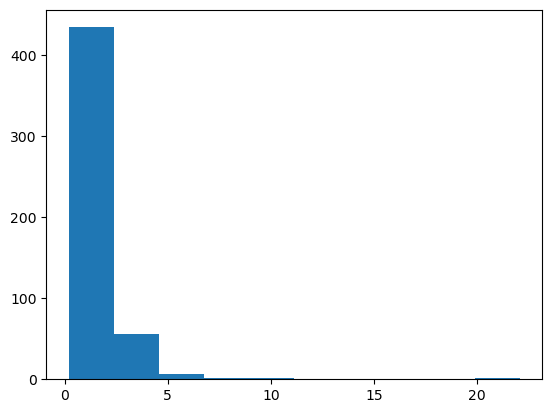

In [292]:
myplot.hist(new_data_for_cluster["Borrower Income Ratio"].sort_values())

In [293]:
first_percentile=np.percentile(new_data_for_cluster["LTV Ratio"], 100)
first_percentile

np.float64(97.0)

(array([434.,  56.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.2113 ,  2.39668,  4.58206,  6.76744,  8.95282, 11.1382 ,
        13.32358, 15.50896, 17.69434, 19.87972, 22.0651 ]),
 <BarContainer object of 10 artists>)

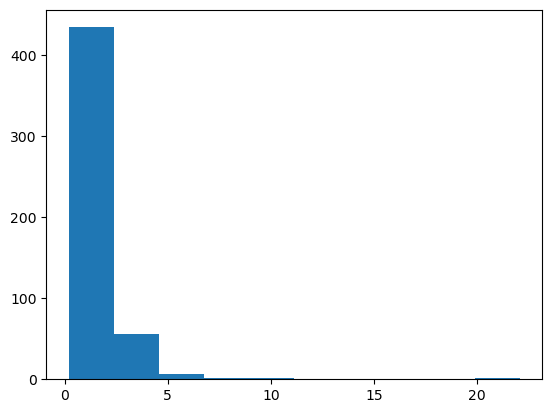

In [294]:
myplot.hist(new_data_for_cluster["Borrower Income Ratio"].sort_values())

In [295]:
new_data_for_cluster["LTV Ratio"].max()

97

(array([  5.,   5.,  14.,  22.,  41.,  51.,  78., 175.,  35.,  74.]),
 array([12.06 , 20.554, 29.048, 37.542, 46.036, 54.53 , 63.024, 71.518,
        80.012, 88.506, 97.   ]),
 <BarContainer object of 10 artists>)

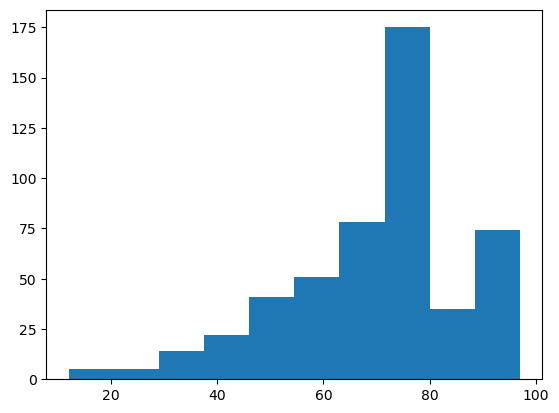

In [296]:
myplot.hist(new_data_for_cluster["LTV Ratio"].sort_values().reset_index(drop=True))

In [297]:
np.percentile(new_data_for_cluster["Borrower Income Ratio"].sort_values().reset_index(drop=True),99)

np.float64(5.266169999999989)

In [298]:
np.percentile(new_data_for_cluster["LTV Ratio"].sort_values().reset_index(drop=True),99)


np.float64(95.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x20db7710a50>,
 'caps': [<matplotlib.lines.Line2D at 0x20db7710cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db7710910>],
 'medians': [<matplotlib.lines.Line2D at 0x20db7710f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db7711090>],
 'means': []}

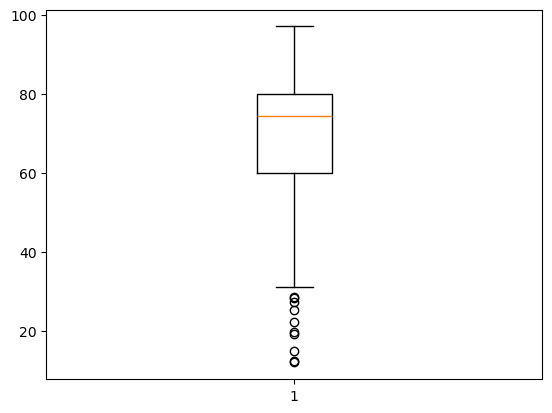

In [299]:

myplot.boxplot(new_data_for_cluster["LTV Ratio"])

In [300]:
list(new_data_for_cluster["Borrower Income Ratio"].sort_values())[4]

0.3281

In [301]:
data_for_clustering.iloc[LTV_outlier.index]

,Column1,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
2,2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
26,26,27,26,13.28,79000,26000,0.3291,2,39,165000,35000,19.35,360,3.87,2
94,94,95,4,22.68,77800,51000,0.6555,2,10,355000,95000,27.42,360,3.62,2
145,145,146,6,70.38,83300,127000,1.5246,2,20,805000,155000,19.75,360,3.12,0
235,235,236,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,1
249,249,250,12,25.71,68300,256000,3.7482,2,20,785000,195000,25.29,120,2.75,0
258,258,259,39,2.55,85200,18000,0.2113,2,47,405000,45000,12.5,240,3,2
309,309,310,42,2.67,82300,27000,0.3281,2,37,325000,35000,12.06,360,4.12,2
473,473,474,25,30.74,114000,118000,1.0351,2,20,1105000,155000,15,240,3.37,1
492,492,493,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,0


{'whiskers': [<matplotlib.lines.Line2D at 0x20db7773110>,
 'caps': [<matplotlib.lines.Line2D at 0x20db7773390>,
 'boxes': [<matplotlib.lines.Line2D at 0x20db7772fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20db7773610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20db7773750>],
 'means': []}

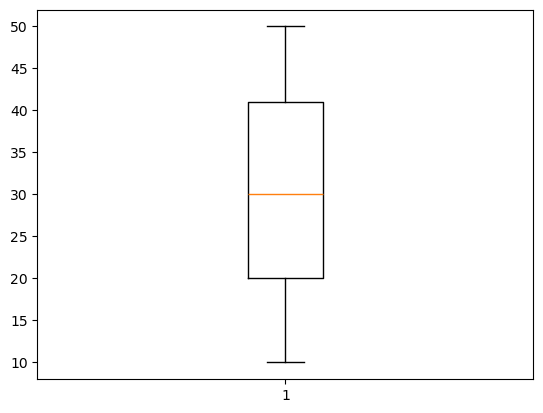

In [302]:
myplot.boxplot(new_data_for_cluster["Borrower Debt to Income Ratio"])

In [303]:
print(new_data_for_cluster["LTV Ratio"].median())
new_data_for_cluster["LTV Ratio"].mean()

74.295


np.float64(70.69492000000005)

In [304]:
len(new_data_for_clustering.columns)

13

In [305]:
columns=np.array(new_data_for_clustering.columns)

reshaped_columns_in_2d=columns.reshape(2,6)

reshaped_columns_in_2d

ValueError: cannot reshape array of size 13 into shape (2,6)

NameError: name 'reshaped_columns_in_2d' is not defined

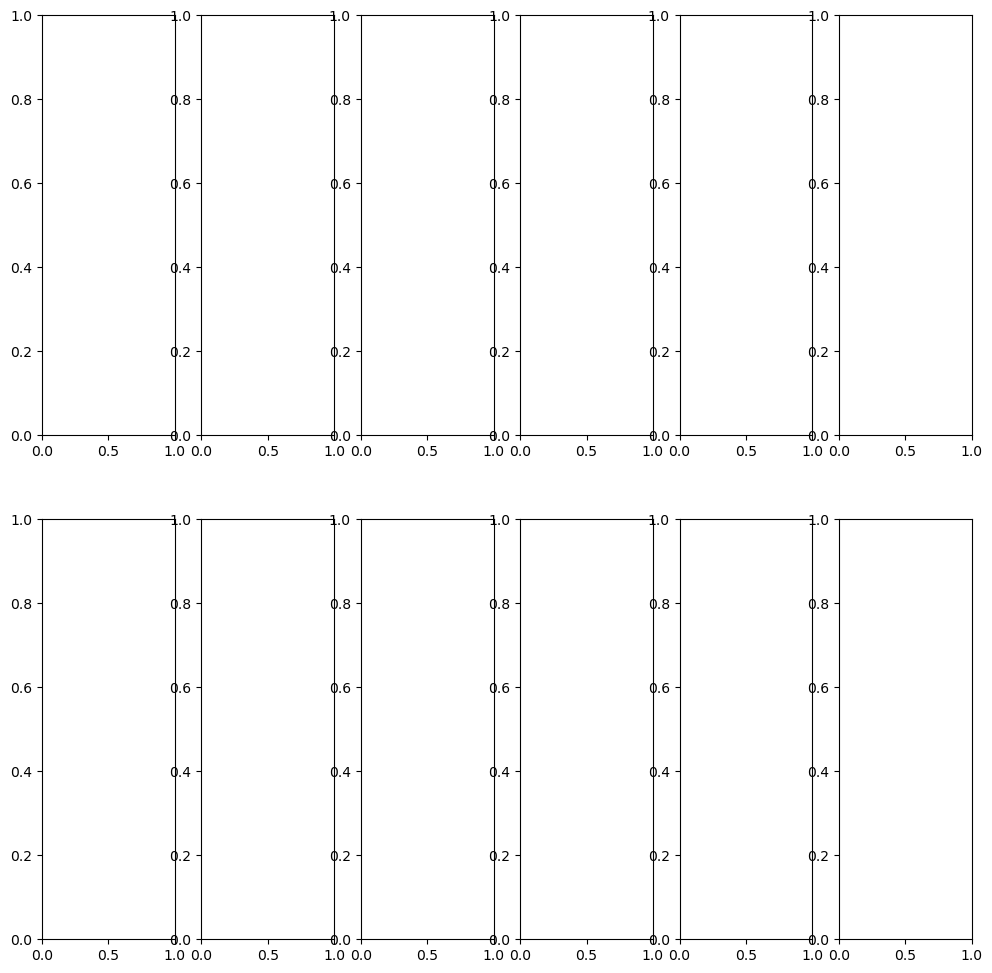

In [306]:
fig,axes=myplot.subplots(2,6, figsize=(12,12))
for i in list(range(0,2)):
   
    for j in list(range(0,6)):
        
        axes[i,j].boxplot(new_data_for_clustering[reshaped_columns_in_2d[i,j]], label=reshaped_columns_in_2d[i,j][0:7])
        axes[i,j].legend()

myplot.show()

In [307]:

def outlier_filler(series):
    
    # IQR 
    q1=np.quantile(series,0.25)
    q3=np.quantile(series,0.75)
    iqr=q3-q1
    
    #Whiskers
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3+1.5*iqr
    
    #Outliers
    upper_outlier_index=series[(series>upper_whisker)].index
    
    lower_outlier_index=series[(series<lower_whisker)].index
    
    #Percentile
    p99=np.percentile(series,99)
    p1=np.percentile(series,1)
    
    #Capping
    series.loc[upper_outlier_index]=p99
    series.loc[lower_outlier_index]=p1
    print(series.name)
    #new_data_for_clustering[series.name]=series 

    new_data_for_clustering[series.name]=series




for column in new_data_for_clustering.columns:
    
    outlier_filler(new_data_for_clustering[column].copy())


Column1
Wide Area Location Code
% Minority in Local Area
Median Family Income in Local Area
Borrower Annual Income
Borrower Income Ratio
First Time Buyer? (1=Yes, 2=No)
Borrower Debt to Income Ratio
Appraised Value of Home
Amount Borrowed
LTV Ratio
Length of Mortgage in Months
Mortgage Interest Rate


In [308]:
new_data_for_clustering.describe()

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.0000,500,500.0,500.00000,500,500,500,500,500,500,500.00
unique,500,47,447.0000,167,190.0,466.00000,2,18,83,63,346,2,36.00
top,0,6,94.3649,83300,475930.0,5.26617,2,20,265000,245000,80,360,2.87
freq,1,80,23.0000,26,23.0,21.00000,444,122,18,25,59,387,54.00


NameError: name 'reshaped_columns_in_2d' is not defined

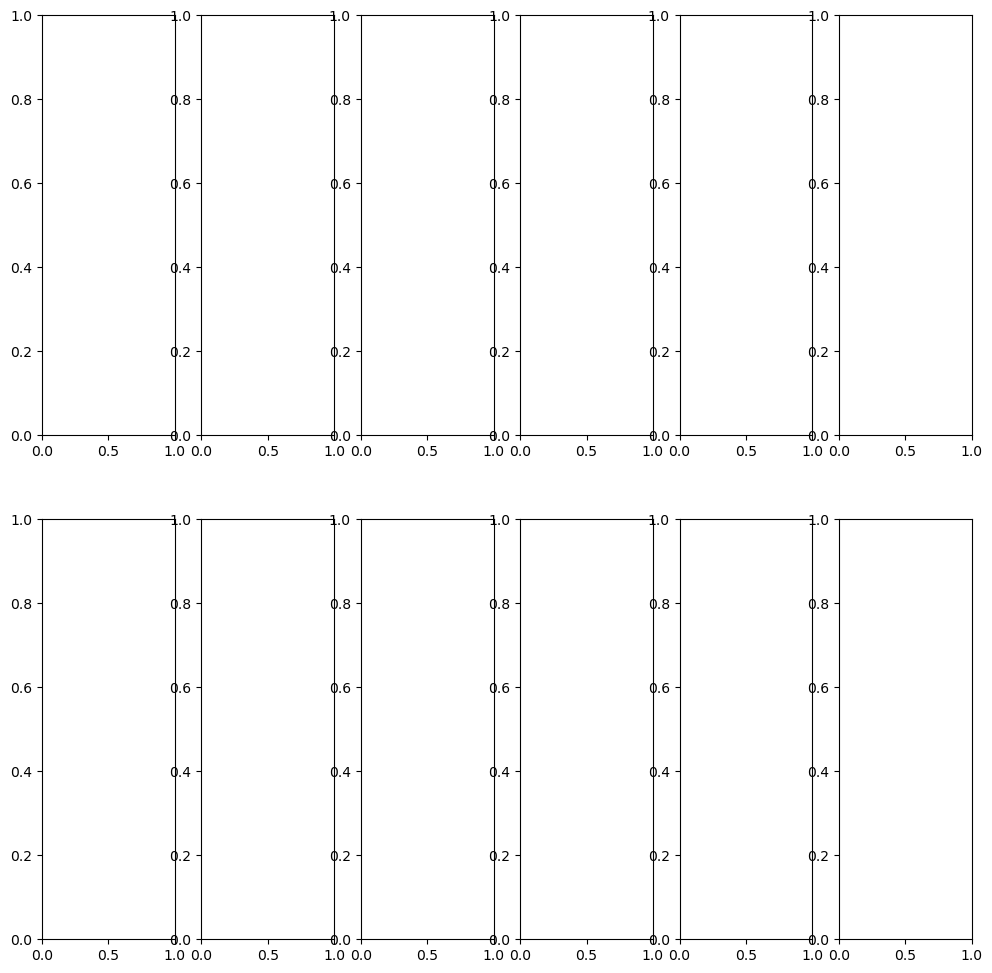

In [309]:
fig2,axes2=myplot.subplots(2,6, figsize=(12,12))
for i in list(range(0,2)):
   
    for j in list(range(0,6)):
        
        axes2[i,j].boxplot(new_data_for_clustering[reshaped_columns_in_2d[i,j]], label=reshaped_columns_in_2d[i,j][0:7])
        axes2[i,j].legend()

myplot.show()

In [ ]:
p99

In [310]:
new_data_for_clustering.columns


Index(['Column1', 'Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [311]:
new_data_for_clustering.head()

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,1,6,94.3649,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3834,180.0,2.5
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180.0,2.25
4,4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87


[20896521175965.168, 20896521175965.168]
500


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,1,6,94.3649,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3834,180.0,2.5,0
3,3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180.0,2.25,1
4,4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87,0


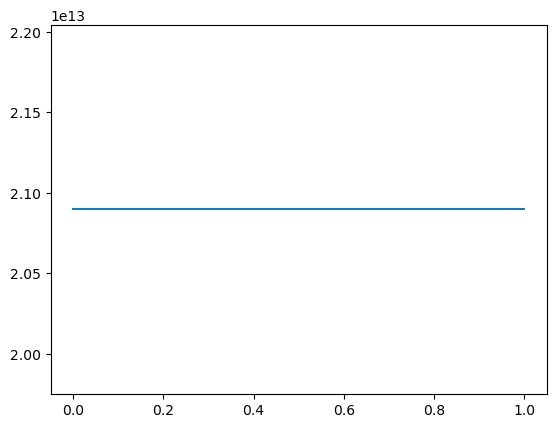

In [312]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia2=[]

K =range(1,3)

for k in K:
    kmean2=KMeans(n_clusters=k, random_state=42)
    kmean2.fit(new_data_for_clustering.drop(["Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)"],axis=1))
    inertia2.append(kmean.inertia_)
print(inertia2)
clusters=kmean2.labels_

print(len(clusters))
k_two_means_data_set2=new_data_for_clustering.copy()
k_two_means_data_set2["Cluster"]=clusters
k_two_means_data_set2
myplot.plot(inertia2)
k_two_means_data_set2.head()

In [313]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca2=k_five_means_data_set2.drop("Cluster", axis=1)

scalerd_data2=scaler.fit_transform(new_data_for_pca2)

from sklearn.decomposition import PCA
pca2= PCA(n_components=2)
new_scalered_data2=pca2.fit_transform(scalerd_data2)


NameError: name 'k_five_means_data_set2' is not defined

In [314]:
new_scalered_data2.shape

NameError: name 'new_scalered_data2' is not defined

In [315]:
myplot.scatter(new_scalered_data2[:,0], new_scalered_data2[:,1], c=k_five_means_data_set2["Cluster"])

NameError: name 'new_scalered_data2' is not defined

### 3-~ Let us begin 

In [316]:
# For comparing the groups we will see the centroid of both group and based on that we can
# Decide which of the attributes makes groups distinguishable.

In [317]:
numeric_columns=new_data_for_clustering.select_dtypes(include='object').columns
new_data_for_clustering[numeric_columns]=new_data_for_clustering[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Statistical Summary of entire data set

In [318]:
new_data_for_clustering.describe()

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,500.000000,500.000000
mean,249.500000,25.466000,28.493885,85252.600000,129164.780000,1.508655,1.888000,30.296000,4.401868e+05,285366.00000,70.721248,319.320000,3.237582
std,144.481833,16.552366,24.121824,15631.748346,94163.367998,1.027817,0.315682,12.072775,2.680920e+05,136829.35939,16.675203,75.358446,0.550212
min,0.000000,1.000000,1.490000,52300.000000,18000.000000,0.211300,1.000000,10.000000,3.500000e+04,25000.00000,22.383400,180.000000,1.990000
25%,124.750000,8.000000,10.472500,74875.000000,69750.000000,0.835100,2.000000,20.000000,2.650000e+05,185000.00000,60.000000,360.000000,2.870000
50%,249.500000,25.000000,19.655000,83300.000000,105500.000000,1.227650,2.000000,30.000000,3.600000e+05,265000.00000,74.295000,360.000000,3.120000
75%,374.250000,39.250000,39.592500,95450.000000,155250.000000,1.882550,2.000000,41.000000,5.550000e+05,375000.00000,80.000000,360.000000,3.500000
max,499.000000,55.000000,94.364900,127900.000000,475930.000000,5.266170,2.000000,50.000000,1.425200e+06,665500.00000,97.000000,360.000000,4.871300


## Centroid Inforamtion per Cluster

In [319]:

centroid_information_data_frame=pd.DataFrame(kmean2.cluster_centers_, columns=new_data_for_clustering.columns,index=["Cluster1","Cluster2"])
centroid_information_data_frame

ValueError: Shape of passed values is (2, 11), indices imply (2, 13)

## PCA information per component

In [320]:
pca_comparision=pd.DataFrame(pca2.components_, columns=new_data_for_clustering.columns, index=['PC1','PC2'])
pca_comparision

ValueError: Shape of passed values is (11, 14), indices imply (2, 13)

In [321]:
new_k_cluster_centers=[item[:-1] for item in kmeans.cluster_centers_]
new_k_cluster_centers
centroids = pd.DataFrame(
    new_k_cluster_centers,
    columns=new_data_for_clustering.columns
)

In [322]:
new_k_cluster_centers=[item[:-1] for item in kmeans.cluster_centers_]
new_k_cluster_centers

[array([2.30031056e+02, 2.31031056e+02, 2.34472050e+01, 3.30779503e+01,
        9.11024845e+04, 1.73397516e+05, 2.00701242e+00, 1.95031056e+00,
        3.07329193e+01, 5.95062112e+05, 3.98291925e+05, 6.89608075e+01,
        3.31304348e+02]),
 array([2.31375000e+02, 2.32375000e+02, 1.67187500e+01, 3.90287500e+01,
        9.90937500e+04, 1.89093750e+05, 1.98239688e+00, 1.93750000e+00,
        2.97187500e+01, 1.09968750e+06, 5.36875000e+05, 5.15709375e+01,
        3.24375000e+02]),
 array([2.61599349e+02, 2.62599349e+02, 2.74364821e+01, 2.47053746e+01,
        8.08195440e+04, 9.72149837e+04, 1.22903225e+00, 1.85016287e+00,
        3.01270358e+01, 2.81384365e+05, 2.01091205e+05, 7.35977199e+01,
        3.18371336e+02])]

In [323]:
new_data_for_clustering.head()


,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,0,53,29.5700,91700,123000.0,1.3413,2,10,385000.0,195000.0,50.6500,360,2.75
1,1,6,94.3649,83300,250000.0,3.0012,2,30,535000.0,505000.0,95.0000,360,3.50
2,2,34,64.1900,96500,64000.0,0.6632,2,43,375000.0,105000.0,22.3834,180,2.50
3,3,51,34.5800,124900,141000.0,1.1289,2,46,665000.0,345000.0,51.5100,180,2.25
4,4,39,17.9300,84600,109000.0,1.2884,1,30,405000.0,325000.0,80.0000,180,2.87


In [324]:
centroids

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,230.031056,231.031056,23.447205,33.077950,91102.484472,173397.515528,2.007012,1.950311,30.732919,5.950621e+05,398291.925466,68.960807,331.304348
1,231.375000,232.375000,16.718750,39.028750,99093.750000,189093.750000,1.982397,1.937500,29.718750,1.099688e+06,536875.000000,51.570937,324.375000
2,261.599349,262.599349,27.436482,24.705375,80819.543974,97214.983713,1.229032,1.850163,30.127036,2.813844e+05,201091.205212,73.597720,318.371336


In [325]:
centroid_diff = (centroids.loc[1] - centroids.loc[2]).abs()
centroid_diff.sort_values(ascending=False)

0
Amount Borrowed                       818303.135179
LTV Ratio                             335783.794788
Borrower Income Ratio                  91878.766287
Borrower Annual Income                 18274.206026
Column1                                   30.224349
Wide Area Location Code                   30.224349
Length of Mortgage in Months              22.026782
Median Family Income in Local Area        14.323375
% Minority in Local Area                  10.717732
Mortgage Interest Rate                     6.003664
First Time Buyer? (1=Yes, 2=No)            0.753365
Appraised Value of Home                    0.408286
Borrower Debt to Income Ratio              0.087337
dtype: float64

In [326]:
df_clustered = new_data_for_clustering.copy()
df_clustered['cluster'] = kmeans.labels_[0:499]

within_std = (
    df_clustered
    .groupby('cluster')
    .std()
    .mean()
)

importance = centroid_diff / within_std
importance.sort_values(ascending=False)


ValueError: Length of values (499) does not match length of index (500)

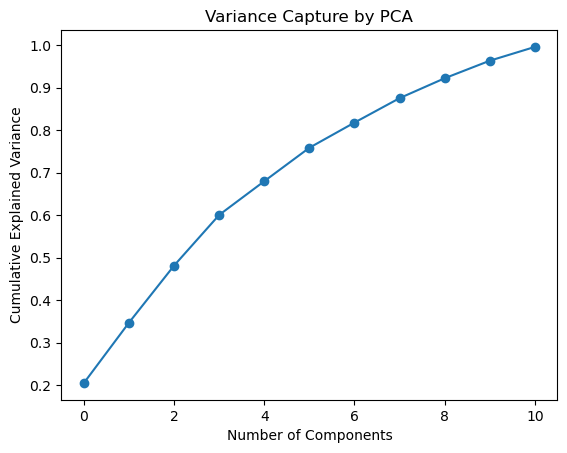

In [327]:
myplot.plot(np.cumsum(pca2.explained_variance_ratio_), marker='o')
myplot.xlabel('Number of Components')
myplot.ylabel('Cumulative Explained Variance')
myplot.title('Variance Capture by PCA')
myplot.show()

In [328]:
pca2.explained_variance_ratio_

array([0.20483133, 0.14207924, 0.13433316, 0.1191971 , 0.07937549,
       0.07872379, 0.05924952, 0.05751596, 0.04687511, 0.04128281,
       0.03247324])

In [329]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.20483133, 0.34691057, 0.48124372, 0.60044082, 0.67981631,
       0.7585401 , 0.81778962, 0.87530558, 0.9221807 , 0.9634635 ,
       0.99593674])

kmean2

In [330]:
new_data_for_clustering["clusters"]=kmean2.labels_

Index(['Column1', 'Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate', 'clusters'],
      dtype='object', name=0)


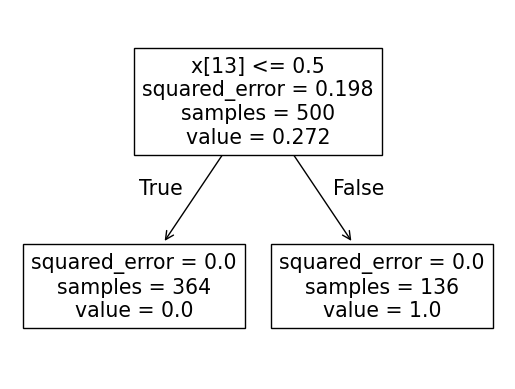

|--- clusters <= 0.50
|   |--- value: [0.00]
|--- clusters >  0.50
|   |--- value: [1.00]



In [331]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=new_data_for_clustering
y=new_data_for_clustering["clusters"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [332]:
new_data_for_clustering.columns[12]

'Mortgage Interest Rate'

In [333]:
new_data_for_clustering.head()

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,0,53,29.5700,91700,123000.0,1.3413,2,10,385000.0,195000.0,50.6500,360,2.75,0
1,1,6,94.3649,83300,250000.0,3.0012,2,30,535000.0,505000.0,95.0000,360,3.50,1
2,2,34,64.1900,96500,64000.0,0.6632,2,43,375000.0,105000.0,22.3834,180,2.50,0
3,3,51,34.5800,124900,141000.0,1.1289,2,46,665000.0,345000.0,51.5100,180,2.25,1
4,4,39,17.9300,84600,109000.0,1.2884,1,30,405000.0,325000.0,80.0000,180,2.87,0


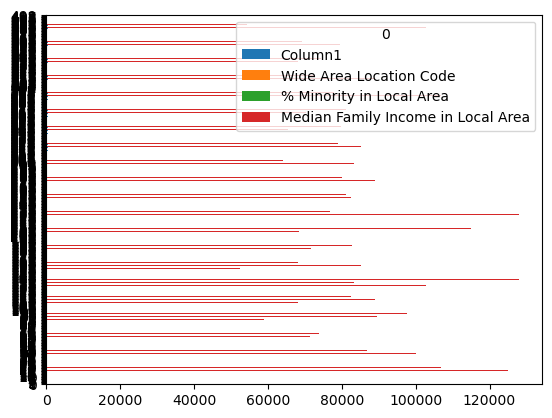

In [334]:
axes=new_data_for_clustering[new_data_for_clustering.columns[:4]].plot(kind='barh')

myplot.show()

In [335]:
y=range(len(new_data_for_clustering.columns)+1)

In [336]:
print(y)

range(0, 15)


In [337]:
new_data_for_clustering.columns[:4]

Index(['Column1', 'Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area'],
      dtype='object', name=0)

In [338]:
demo=new_data_for_clustering[new_data_for_clustering.columns[:1]]
demo.sort_values(by='Wide Area Location Code').reset_index(drop=True).plot(kind='line')

KeyError: 'Wide Area Location Code'

In [ ]:
demo.T


In [ ]:
two_groups_of_customer=new_data_for_clustering.groupby(by="clusters")
#two_groups_of_customer.get_group("First Time Buyer? (1=Yes, 2=No)"==1)

In [ ]:
group1=two_groups_of_customer.get_group(0)
group1

In [ ]:
group2=two_groups_of_customer.get_group(1)
group2

In [ ]:
centroid_data_frame=pd.DataFrame(kmean2.cluster_centers_, columns=new_data_for_clustering.drop("clusters",axis=1).columns)
centroid_data_frame

In [ ]:
myplot.boxplot(new_data_for_clustering["Median Family Income in Local Area"])

In [ ]:
group1_statistical_mean=group1.apply(lambda x:x.agg( ['mean','median']   ))
group1_statistical_mean

In [ ]:
group2_statistical_mean=group2.apply(lambda x:x.agg( ['mean','median']   ))
group2_statistical_mean

In [ ]:
g1s=group1_statistical_mean.plot(kind='barh',label="group1")
g1s.legend()

In [ ]:
g2s=group2_statistical_mean.plot(kind='barh', label='group2')
g2s.legend()

In [ ]:
group2["Wide Area Location Code"].value_counts()[:2]

In [ ]:
group1["Wide Area Location Code"].value_counts()[:5]

In [ ]:
group1["Borrower Annual Income"].value_counts()

In [ ]:
group1["First Time Buyer? (1=Yes, 2=No)"].value_counts()

In [ ]:
group2["First Time Buyer? (1=Yes, 2=No)"].value_counts()

In [ ]:
new_data_for_clustering["First Time Buyer? (1=Yes, 2=No)"].value_counts()

In [ ]:
group=new_data_for_clustering.groupby(by="First Time Buyer? (1=Yes, 2=No)")["Borrower Annual Income"]

In [ ]:
group.get_group(1).mean()

In [ ]:
group.get_group(2).mean()

In [ ]:
group1_statistical_mean.reset_index
group1_statistical_mean

In [ ]:
group1_df=pd.DataFrame(group1_statistical_mean)
group1_df.columns.name="Group1"
group1_df.reset_index(drop=True)

In [ ]:
group2_df=pd.DataFrame(group2_statistical_mean)
group2_df.columns.name="Group2"
group2_df.reset_index(drop=True)

In [ ]:
joined_stat_df=group1_df.join(group2_df, lsuffix='_Group1', rsuffix='_Group2')
joined_stat_df

In [ ]:
columns=["% Minority in Local Area", "Borrower Debt to Income Ratio","LTV Ratio","Borrower Income Ratio","Mortgage Interest Rate"]
joined_stat_df.loc[columns].plot(kind='bar')

In [ ]:
columns2=[index for index in  joined_stat_df.index if index not in columns ]

In [ ]:
columns2=np.array(columns2)
columns2=columns2[[1,2,4,5]]
columns2

In [339]:
joined_stat_df.loc[columns2].plot(kind='bar')

NameError: name 'joined_stat_df' is not defined

In [ ]:
centroid_data_frame

In [ ]:
dataSet.columns

In [ ]:
dataSet["Age of Borrower"].value_counts()

In [ ]:
dataSet["Age of Borrower"].value_counts(normalize=True)

In [ ]:
myplot.boxplot(data_for_clustering["Borrower Annual Income"])

In [ ]:
k_two_means_data_set2["Age of Borrower"]=dataSet["Age of Borrower"]

In [ ]:
len(dataSet.columns)

In [ ]:
len(k_two_means_data_set2.columns)

In [ ]:
k_two_means_data_set2.columns

In [ ]:
dataSet.columns

In [ ]:
k_two_means_data_set2.head()

In [ ]:
age_profiling=k_two_means_data_set2.groupby('Cluster')["Age of Borrower"]

In [340]:
cluster1_age_profiling=age_profiling.get_group(0).value_counts(normalize=True)
cluster1_age_profiling

NameError: name 'age_profiling' is not defined

In [341]:
cluster2_age_profiling=age_profiling.get_group(1).value_counts(normalize=True)
cluster2_age_profiling

NameError: name 'age_profiling' is not defined

In [342]:
area_code_profiling=k_two_means_data_set2.groupby("Cluster")["Wide Area Location Code"]

cluster1_top_ten_area_code=area_code_profiling.get_group(0).value_counts(normalize=True)[:10]
cluster1_top_ten_area_code



Wide Area Location Code
6     0.082418
48    0.074176
12    0.057692
39    0.046703
17    0.043956
26    0.043956
4     0.038462
18    0.035714
53    0.035714
13    0.035714
Name: proportion, dtype: float64

In [343]:
cluster2_top_ten_area_code=area_code_profiling.get_group(1).value_counts(normalize=True)[:10]
cluster2_top_ten_area_code



Wide Area Location Code
6     0.367647
8     0.095588
53    0.058824
36    0.051471
24    0.036765
51    0.029412
48    0.029412
34    0.029412
25    0.029412
37    0.029412
Name: proportion, dtype: float64

In [344]:
buyer_profiling=k_two_means_data_set2.groupby("Cluster")["First Time Buyer? (1=Yes, 2=No)"]
buyer_profiling=buyer_profiling.get_group(0).value_counts(normalize=True)
cluster1_buyer_profiling=buyer_profiling
cluster1_buyer_profiling

First Time Buyer? (1=Yes, 2=No)
2      0.862637
1.0    0.137363
Name: proportion, dtype: float64

In [345]:
buyer_profiling=k_two_means_data_set2.groupby("Cluster")["First Time Buyer? (1=Yes, 2=No)"]

cluster2_buyer_profiling=buyer_profiling.get_group(1).value_counts(normalize=True)
cluster2_buyer_profiling

First Time Buyer? (1=Yes, 2=No)
2      0.955882
1.0    0.044118
Name: proportion, dtype: float64

In [346]:
new_clusters=k_two_means_data_set2.groupby("Cluster")
cluster1=new_clusters.get_group(0)
cluster2=new_clusters.get_group(1)
cluster1

,Column1,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
2,2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3834,180.0,2.5,0
4,4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87,0
6,6,8,81.63,100000,145000,1.45,1.0,30,475000,395000,85,180.0,2.12,0
7,7,53,39.06,74600,475930.0,5.26617,2,20,265000,155000,60,360,2.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180.0,2.75,0
496,496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180.0,2.87,0
498,498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,0


In [347]:
cluster1_df=pd.DataFrame(cluster1.drop(["Age of Borrower","Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)","Cluster"], axis=1).apply(lambda x:x.agg("median") ))
cluster1_df.reset_index(inplace=True, drop=True)

cluster1_df.columns=["Cluster 1"]

cluster1_df

KeyError: "['Age of Borrower'] not found in axis"

In [348]:
cluster2_df=pd.DataFrame(cluster2.drop(["Age of Borrower","Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)","Cluster"], axis=1).apply(lambda x:x.agg("median") ))
cluster2_df.reset_index(inplace=True, drop=True)

cluster2_df.columns=["Cluster 2"]

cluster2_df

KeyError: "['Age of Borrower'] not found in axis"

In [349]:
columns_for_joined_clusters=cluster1.drop(["Age of Borrower","Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)","Cluster"], axis=1).columns
columns_for_joined_clusters

KeyError: "['Age of Borrower'] not found in axis"

In [350]:
joined_clusters1_and_2=cluster1_df.join(cluster2_df)
joined_clusters1_and_2.index=columns_for_joined_clusters
joined_clusters1_and_2.index.name=None
joined_clusters1_and_2

NameError: name 'cluster1_df' is not defined

In [351]:
joined_clusters1_and_2.index

NameError: name 'joined_clusters1_and_2' is not defined

In [352]:
borrower_leverage_and_affordability_metrics=joined_clusters1_and_2.loc[['Borrower Debt to Income Ratio','LTV Ratio']]

NameError: name 'joined_clusters1_and_2' is not defined

In [353]:
borrower_leverage_and_affordability_metrics.plot(kind='barh')

NameError: name 'borrower_leverage_and_affordability_metrics' is not defined

In [354]:
joined_clusters1_and_2.loc[[index for index in joined_clusters1_and_2.index if index not in ['Borrower Income Ratio','Borrower Debt to Income Ratio','LTV Ratio','% Minority in Local Area','Length of Mortgage in Months', 'Mortgage Interest Rate']]
].plot(kind='barh')

NameError: name 'joined_clusters1_and_2' is not defined

In [355]:
joined_clusters1_and_2.loc[['Borrower Income Ratio']].plot(kind='barh')


NameError: name 'joined_clusters1_and_2' is not defined

In [356]:
joined_clusters1_and_2.loc['Borrower Income Ratio']

NameError: name 'joined_clusters1_and_2' is not defined

In [357]:
joined_clusters1_and_2.loc[['Borrower Income Ratio']]

NameError: name 'joined_clusters1_and_2' is not defined

Figure(800x400)


NameError: name 'cluster1_age_profiling' is not defined

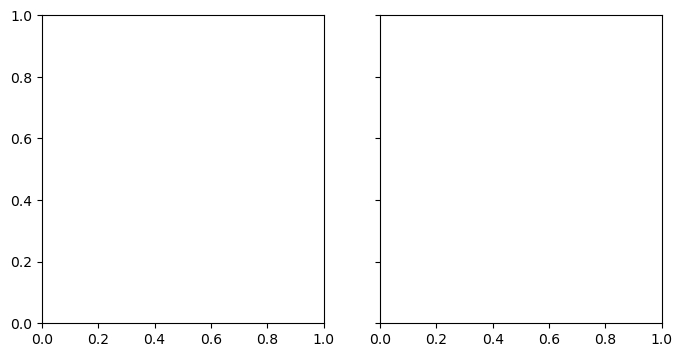

In [358]:
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
print(figure)
plot[0].barh(cluster1_age_profiling.index, cluster1_age_profiling.values, label="Cluster1_Age")
plot[1].barh(cluster2_age_profiling.index, cluster2_age_profiling.values, label="Cluster2_Age")
plot[0].legend()
plot[1].legend()

myplot.show()

In [ ]:
demo=joined_clusters1_and_2.loc[[index for index in joined_clusters1_and_2.index if index not in ['Borrower Income Ratio','Borrower Debt to Income Ratio','LTV Ratio','% Minority in Local Area','Length of Mortgage in Months', 'Mortgage Interest Rate']]
]
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharex=True)
print(figure)
plot[0].barh(demo.index, demo.values[:,0], label="Cluster1")
plot[1].barh(demo.index, demo.values[:,1], label="Cluster2")

plot[0].legend()

plot[1].legend()
plot[1].set_yticklabels([])
plot[1].yaxis.set_visible(False)
myplot.show()

In [359]:
borrower_leverage_and_affordability_metrics
print(borrower_leverage_and_affordability_metrics)
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
print(figure)
plot[0].barh(borrower_leverage_and_affordability_metrics.index, borrower_leverage_and_affordability_metrics.values[:,0], label="Cluster1")
plot[1].barh(borrower_leverage_and_affordability_metrics.index, borrower_leverage_and_affordability_metrics.values[:,1], label="Cluster2")

plot[0].legend()

plot[1].legend()

myplot.show()

NameError: name 'borrower_leverage_and_affordability_metrics' is not defined

Figure(800x400)
[0 1]


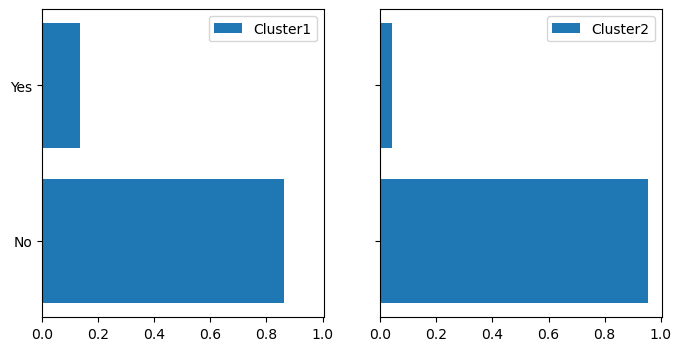

In [360]:
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
print(figure)
ypos=np.arange(len(cluster1_buyer_profiling.index))
print(ypos)

plot[0].barh(ypos, cluster1_buyer_profiling.values, label="Cluster1")

plot[1].barh(ypos, cluster2_buyer_profiling.values, label="Cluster2")

plot[0].legend()

plot[1].legend()
plot[0].set_yticks(ypos)
plot[0].set_yticklabels(["No","Yes"])
myplot.show()




<Axes: ylabel='First Time Buyer? (1=Yes, 2=No)'>

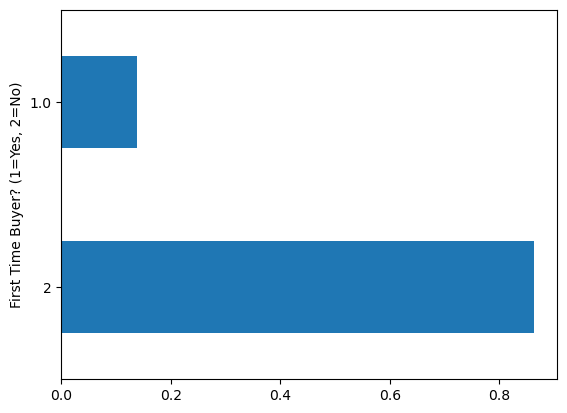

In [361]:
cluster1_buyer_profiling.plot(kind='barh')

[0 1 2 3 4 5 6 7 8 9]


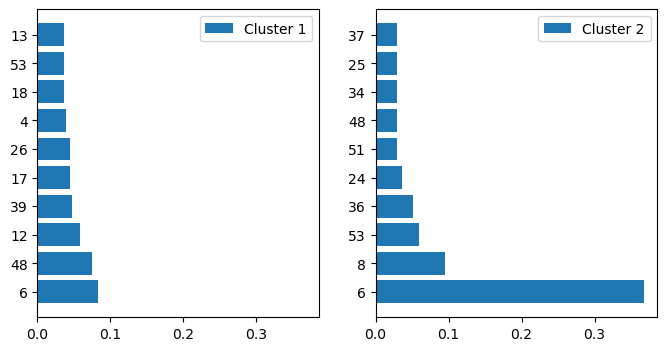

In [362]:
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharex=True)
ypos1=np.arange(len(cluster1_top_ten_area_code.index))
ypos2=np.arange(len(cluster2_top_ten_area_code.index))
labels1=cluster1_top_ten_area_code.index
labels2=cluster2_top_ten_area_code.index

print(ypos1)

plot[0].barh(ypos1, cluster1_top_ten_area_code.values, label="Cluster 1")
plot[1].barh(ypos2, cluster2_top_ten_area_code.values, label="Cluster 2")
plot[0].legend()

plot[1].legend()
plot[0].set_yticks(ypos1)
plot[0].set_yticklabels(labels1)
plot[1].set_yticks(ypos2)
plot[1].set_yticklabels(labels2)

myplot.show()

(array([401.,  85.,   9.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  18000.,  172200.,  326400.,  480600.,  634800.,  789000.,
         943200., 1097400., 1251600., 1405800., 1560000.]),
 <BarContainer object of 10 artists>)

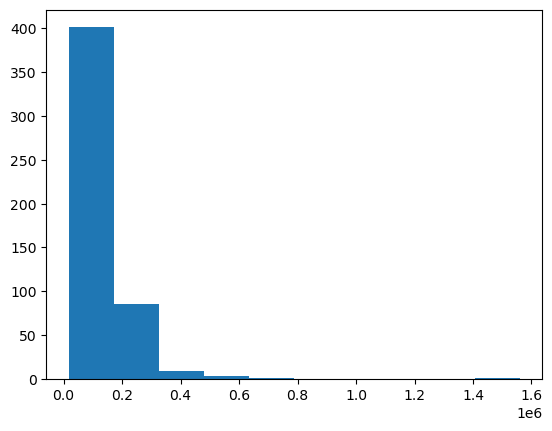

In [363]:
myplot.hist(dataSet["Borrower Annual Income"])

In [364]:
dataSet.to_csv("/Users/karanbudhaair/Downloads/commBankUnfilteredData.csv")

OSError: Cannot save file into a non-existent directory: '\Users\karanbudhaair\Downloads'

In [ ]:
final_data_set=k_two_means_data_set2.drop("Cluster", axis=1).copy()


In [ ]:
final_data_set.head()

In [365]:
dti=final_data_set.groupby("Age of Borrower")["Borrower Debt to Income Ratio"]
dti.agg(["mean","median"])

NameError: name 'final_data_set' is not defined

In [ ]:
ltv=final_data_set.groupby("Age of Borrower")["LTV Ratio"]
ltv.agg(["mean","median"])

In [366]:
myplot.hist(final_data_set["LTV Ratio"])

NameError: name 'final_data_set' is not defined

In [ ]:
data_for_clustering[data_for_clustering["LTV Ratio"]<=60].count()

<BarContainer object of 4 artists>

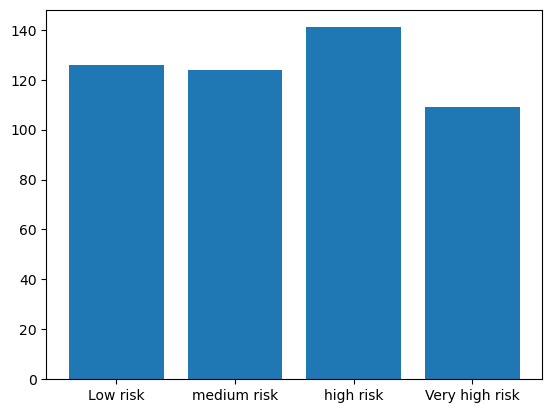

In [367]:
myplot.bar(["Low risk", "medium risk", "high risk", "Very high risk"],[126,124,141,109])

Text(0.5, 1.0, 'Home Purchases Peak Among Ages 35–44')

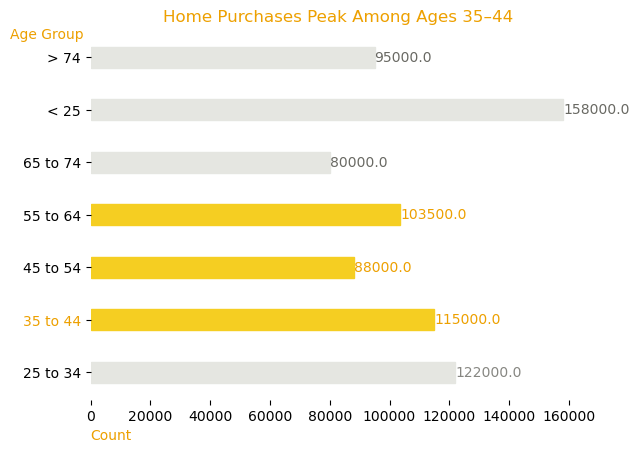

In [378]:
fig, axes=myplot.subplots()
age_group=dataSet.groupby(by="Age of Borrower")["Borrower Annual Income"].median()
print(
bar_objects=myplot.barh(age_group.index,age_group.values, height=0.4) 


all_ytickslabels=axes.get_yticklabels()
color_item_index=[1,2,3]
for item in color_item_index:
    all_ytickslabels[1].set_color("#EDA000")
    bar_objects[item].set_color("#f5ce22")
    
# putting information in backgroud
shadow_bars=[0,4,5,6]
for item in shadow_bars:
   
    bar_objects[item].set_color("#e5e6e1")
    
    


selected_bars = [0,1,2, 3,4,5,6]
label_colors = ["#878782","#EDA000","#EDA000","#EDA000","#696963","#696963","#696963"]

for idx, bar_idx in enumerate(selected_bars):
    bar = bar_objects[bar_idx]
    axes.text(bar.get_width() + 4.5, bar.get_y() + bar.get_height()/2,
            f"{bar.get_width()}",
            color=label_colors[idx],
            va='center')
axes.set_ylabel("Age Group",loc="top", color="#EDA000", rotation=0, labelpad=0 )
axes.set_xlabel("Count",loc='left', color="#EDA000")
axes.yaxis.set_label_coords(-0.014,0.968)

#Adjusting the y_axis line
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.set_title("Home Purchases Peak Among Ages 35–44", color="#EDA000")


In [369]:
age_group.sum()

np.int64(500)

In [370]:
dataSet["First Time Buyer? (1=Yes, 2=No)"]

0      2
1      2
2      2
3      2
4      1
      ..
495    2
496    2
497    2
498    2
499    1
Name: First Time Buyer? (1=Yes, 2=No), Length: 500, dtype: object

In [371]:
age_=dataSet.groupby(by="Age of Borrower")["First Time Buyer? (1=Yes, 2=No)"].count().sum()
age_

np.int64(500)

In [373]:
dataSet.groupby("Age of Borrower")["Borrower Annual Income"].median()

Age of Borrower
25 to 34    122000.0
35 to 44    115000.0
45 to 54     88000.0
55 to 64    103500.0
65 to 74     80000.0
< 25        158000.0
> 74         95000.0
Name: Borrower Annual Income, dtype: object

In [374]:
dataSet.groupby("Age of Borrower")["Borrower Annual Income"].mean()

Age of Borrower
25 to 34         140080.0
35 to 44    129525.179856
45 to 54    108484.536082
55 to 64    134534.090909
65 to 74    108366.666667
< 25         167297.87234
> 74        109368.421053
Name: Borrower Annual Income, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x20dbde86350>,
 'caps': [<matplotlib.lines.Line2D at 0x20dbde865d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20dbde86210>],
 'medians': [<matplotlib.lines.Line2D at 0x20dbde86850>],
 'fliers': [<matplotlib.lines.Line2D at 0x20dbde86990>],
 'means': []}

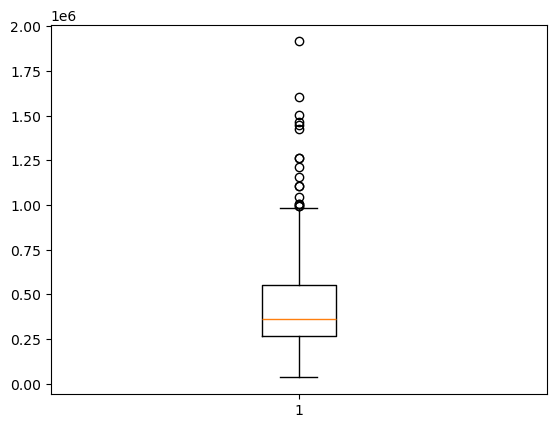

In [379]:
myplot.boxplot(dataSet["Appraised Value of Home"])

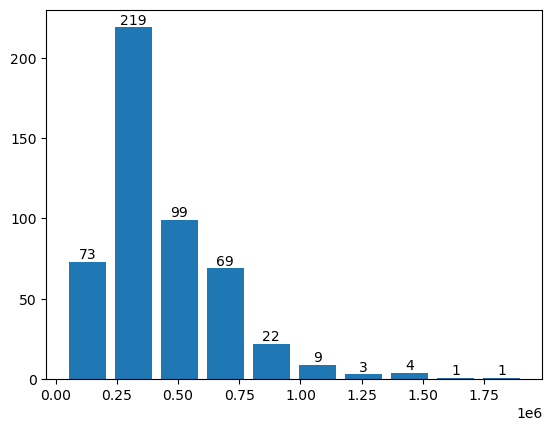

In [471]:
counts, bins, patches=myplot.hist(dataSet["Appraised Value of Home"], rwidth=0.8)
for count,patch in zip(counts,patches):
    myplot.text(patch.get_x()+patch.get_width()/2, count, int(count),ha="center", va="bottom")

In [472]:
counts

array([ 73., 219.,  99.,  69.,  22.,   9.,   3.,   4.,   1.,   1.])

In [473]:
bins

array([  35000.,  223000.,  411000.,  599000.,  787000.,  975000.,
       1163000., 1351000., 1539000., 1727000., 1915000.])

dtype('int64')

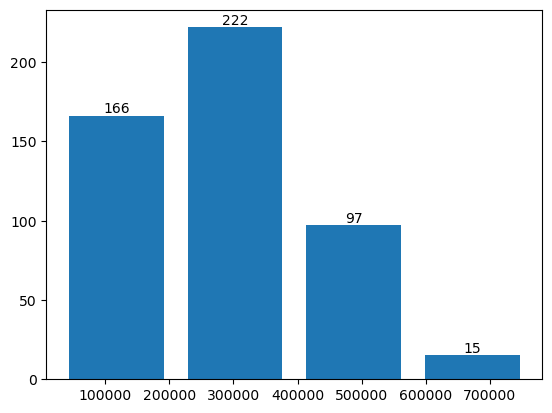

In [493]:
counts, bins, patches=myplot.hist(dataSet["Amount Borrowed"], rwidth=0.8, bins=4)
for count,patch in zip(counts,patches):
    myplot.text(patch.get_x()+patch.get_width()/2, count, int(count),ha="center", va="bottom")

In [494]:
bins

array([ 25000., 210000., 395000., 580000., 765000.])

In [495]:
counts

array([166., 222.,  97.,  15.])